In [1]:
# Code for plotting a summary of analogue finding methods
import numpy as np
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
fdates = pd.date_range(start='2015-10-01T12:00:00',
                      end='2015-12-29T12:00:00',
                      freq='1D')

In [37]:
methods = [
    "rmse_pcpT00",
    "rmse_pcpT00+dewptT00",
    "rmse_pcpT00+dewptT00+mslpT00",
    "rmse_pcpT00+dewptf00",
    "rmse_pcpT00+dewptf00+mslpf00",
    "rmse_pcpT00+capeT-3",
    "rmse_pcpT00+dewptT-3",
    "pcp_area_rmse_pcpT00+dewptT-3",
    "pcp_area_rmse_pcpT00+dewptT-3+mslpT-3",
    "pcp_area_rmse_pcpT00+dewptf00+mslpf00",
    "pcp_area_rmse_pcpT00+temp_2mT00",
    "pcp_area_rmse_pcpT00+height_500hPaT00",
    "pcp_area_rmse_pcpT00+hgt500f00+capeT-3",
    "rmse_pcpT00+hgt500f00+capeT-3",
          ]

method_labels = [
    "pcpT00",
    "Different Points - pcpT00+dewptT00",
    "Different Points - pcpT00+dewptT00+mslpT00",
    "Different Points - pcpT00+dewptf00",
    "Different Points - pcpT00+dewptf00+mslpf00",
    "Different Points - pcpT00+capeT-3",
    "Different Points - pcpT00+dewptT-3",
    "Same Points - pcpT00+dewptT-3",
    "Same Points - pcpT00+dewptT-3+mslpT-3",
    "Same Points - pcpT00+dewptf00+mslpf00",
    "Same Points - pcpT00+temp_2mT00",
    "Same Points - pcpT00+hgt500T00",
    "Same Points - pcpT00+hgt500f00+capeT-3",
    "Different Points - pcpT00+hgt500f00+capeT-3",
          ]

In [38]:
mem_colors = ['tab:orange', 'tab:blue', 'tab:green', 'cyan', 'yellow', 'tan', 'violet', 'olive', 'skyblue', 'coral', 
              'lightslategrey', 'pink', 'chocolate', 'tab:red']

### Plot Method for d01, Same Analogue Date for MP and PBL ###

All methods are used to calculate the analogue, same date is considered for both MP and PBL members

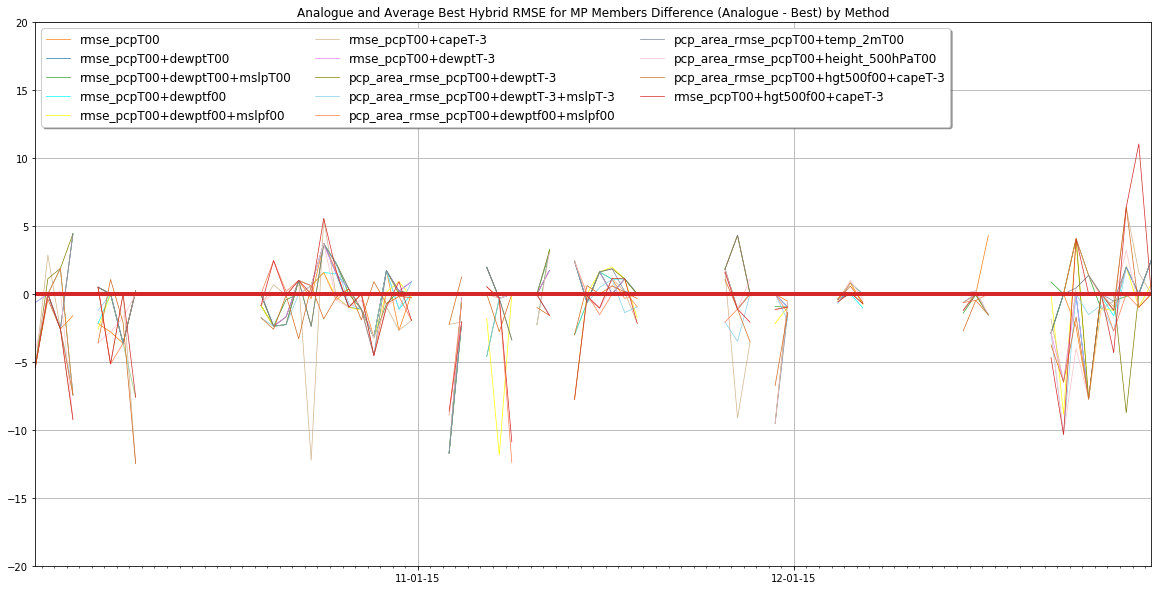

In [39]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 1, 1)
for i in range(len(methods)):
    data_an = np.load('/lustre/work/twixtrom/analogue_analysis_rename/f48/domain1/'+methods[i]+'/'+methods[i]+'_rmse_an_mp.npy')
    data_best = np.load('/lustre/work/twixtrom/analogue_analysis_rename/f48/domain1/'+methods[i]+'/'+methods[i]+'_rmse_best_mp.npy')
    diff_rmse_mp = data_best - data_an
    plt.plot(fdates, diff_rmse_mp, color=mem_colors[i],
             label=methods[i],
             linewidth=0.7)
plt.ylim(-20, 20)
plt.title('Analogue and Average Best Hybrid RMSE for MP Members Difference (Analogue - Best) by Method')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d-%y'))
ax.xaxis.set_minor_locator(mdates.DayLocator())
ax.axhline(linewidth=4, color='tab:red')
plt.xlim(pd.Timestamp('2015-10-01T12:00:00'), pd.Timestamp('2015-12-29T12:00:00'))
plt.legend(shadow=True, fontsize='large', loc=2, ncol=3)
plt.grid()
plt.show()

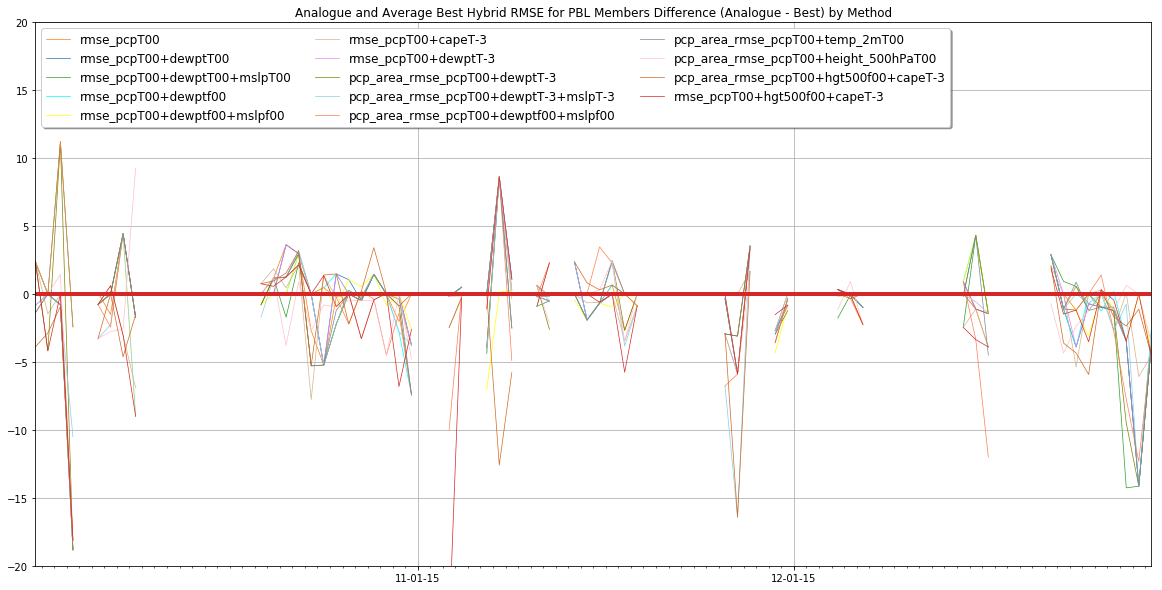

In [40]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 1, 1)
for i in range(len(methods)):
    data_an = np.load('/lustre/work/twixtrom/analogue_analysis_rename/f48/domain1/'+methods[i]+'/'+methods[i]+'_rmse_an_pbl.npy')
    data_best = np.load('/lustre/work/twixtrom/analogue_analysis_rename/f48/domain1/'+methods[i]+'/'+methods[i]+'_rmse_best_pbl.npy')
    diff_rmse_mp = data_best - data_an
    plt.plot(fdates, diff_rmse_mp, color=mem_colors[i],
             label=methods[i],
             linewidth=0.7)
plt.ylim(-20, 20)
plt.title('Analogue and Average Best Hybrid RMSE for PBL Members Difference (Analogue - Best) by Method')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d-%y'))
ax.xaxis.set_minor_locator(mdates.DayLocator())
ax.axhline(linewidth=4, color='tab:red')
plt.legend(shadow=True, fontsize='large', loc=2, ncol=3)
plt.xlim(pd.Timestamp('2015-10-01T12:00:00'), pd.Timestamp('2015-12-29T12:00:00'))
plt.grid()
plt.show()

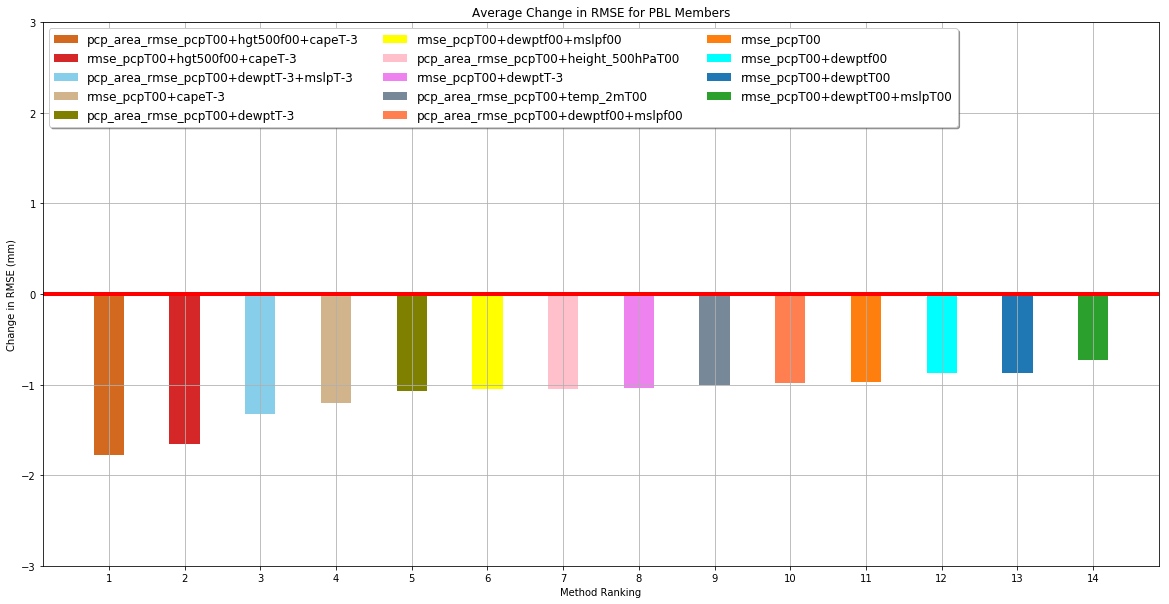

In [41]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 1, 1)
mean_rmse_change = []
i = 0
for method in methods:
    data_an = np.load('/lustre/work/twixtrom/analogue_analysis_rename/f48/domain1/'+method+'/'+method+'_rmse_an_pbl.npy')
    data_best = np.load('/lustre/work/twixtrom/analogue_analysis_rename/f48/domain1/'+method+'/'+method+'_rmse_best_pbl.npy')
    mean_rmse_change.append(np.nanmean(data_best - data_an))

sort = np.argsort(np.array(mean_rmse_change))
rmse_change_sorted = np.array(mean_rmse_change)[sort]
methods_sorted = np.array(methods)[sort]
colors_sorted = np.array(mem_colors)[sort]
for i in range(len(methods)):
    plt.bar(i+1, np.array(rmse_change_sorted[i]), 0.4, label=methods_sorted[i], color=colors_sorted[i])

plt.ylim(-3, 3)
plt.xticks(range(1, 15))
plt.title('Average Change in RMSE for PBL Members')
plt.ylabel('Change in RMSE (mm)')
plt.xlabel('Method Ranking')
ax.axhline(linewidth=4, color='red')
plt.legend(shadow=True, fontsize='large', loc=2, ncol=3)
plt.grid()
plt.show()

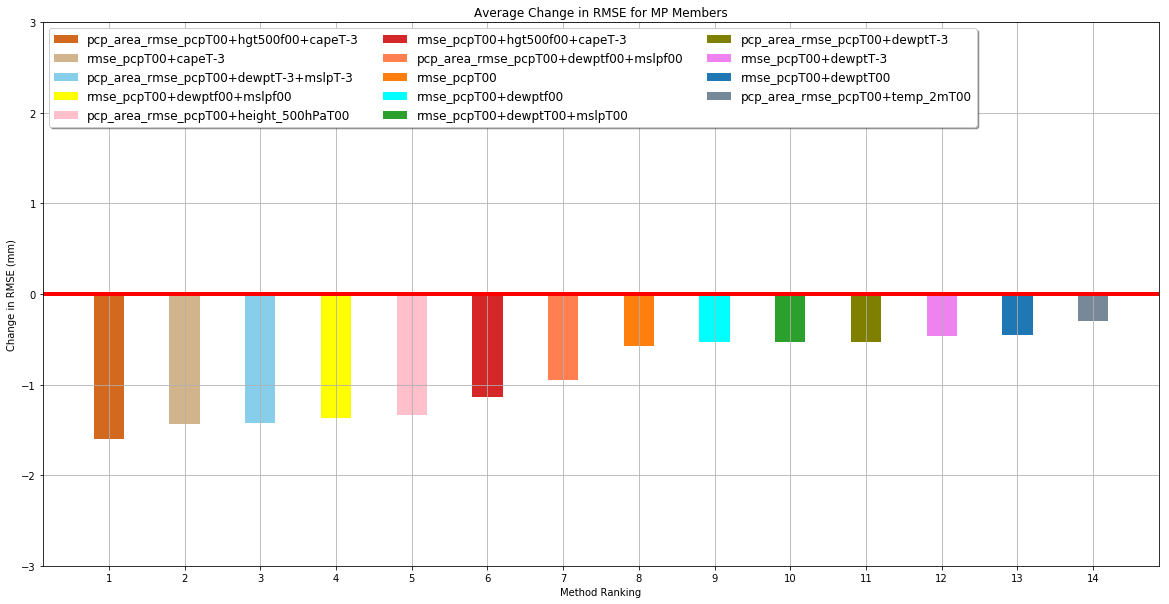

In [42]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 1, 1)
mean_rmse_change = []
i = 0
for method in methods:
    data_an = np.load('/lustre/work/twixtrom/analogue_analysis_rename/f48/domain1/'+method+'/'+method+'_rmse_an_mp.npy')
    data_best = np.load('/lustre/work/twixtrom/analogue_analysis_rename/f48/domain1/'+method+'/'+method+'_rmse_best_mp.npy')
    mean_rmse_change.append(np.nanmean(data_best - data_an))

sort = np.argsort(np.array(mean_rmse_change))
rmse_change_sorted = np.array(mean_rmse_change)[sort]
methods_sorted = np.array(methods)[sort]
colors_sorted = np.array(mem_colors)[sort]
for i in range(len(methods)):
    plt.bar(i+1, np.array(rmse_change_sorted[i]), 0.4, label=methods_sorted[i], color=colors_sorted[i])

plt.ylim(-3, 3)
plt.xticks(range(1, 15))
plt.ylabel('Change in RMSE (mm)')
plt.xlabel('Method Ranking')
plt.title('Average Change in RMSE for MP Members')
ax.axhline(linewidth=4, color='red')
plt.legend(shadow=True, fontsize='large', loc=2, ncol=3)
plt.grid()
plt.show()

In [43]:
d2methods = [
    "rmse_pcpf48+hgt500f00+capef45",
    "rmse_pcpf48+capef45",
    "rmse_pcp",
    "rmse_pcpf48+dewptf48",
    "rmse_pcpf48+dewptf00+mslpf00",
    "rmse_pcpf48+dewptf48+mslpf48",
    "rmse_pcpf48+capef47",
    "pcp_area_rmse_pcpf48+dewptf45",
          ]

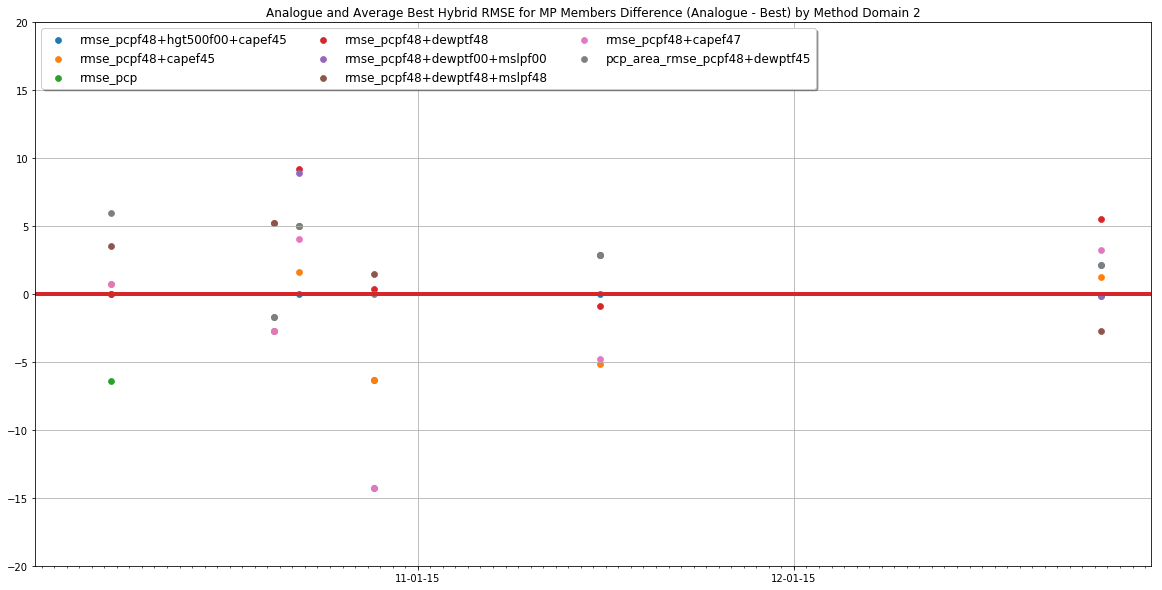

In [44]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 1, 1)
for method in d2methods:
    data_an = np.load('/lustre/work/twixtrom/analogue_analysis/domain2/'+method+'/'+method+'_rmse_an_mp.npy')
    data_best = np.load('/lustre/work/twixtrom/analogue_analysis/domain2/'+method+'/'+method+'_rmse_best_mp.npy')
    diff_rmse_mp = data_best - data_an
    plt.scatter(fdates, diff_rmse_mp,
             label=method,
             linewidth=0.7)
plt.ylim(-20, 20)
plt.title('Analogue and Average Best Hybrid RMSE for MP Members Difference (Analogue - Best) by Method Domain 2')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d-%y'))
ax.xaxis.set_minor_locator(mdates.DayLocator())
ax.axhline(linewidth=4, color='tab:red')
plt.xlim(pd.Timestamp('2015-10-01T12:00:00'), pd.Timestamp('2015-12-29T12:00:00'))
plt.legend(shadow=True, fontsize='large', loc=2, ncol=3)
plt.grid()
plt.show()

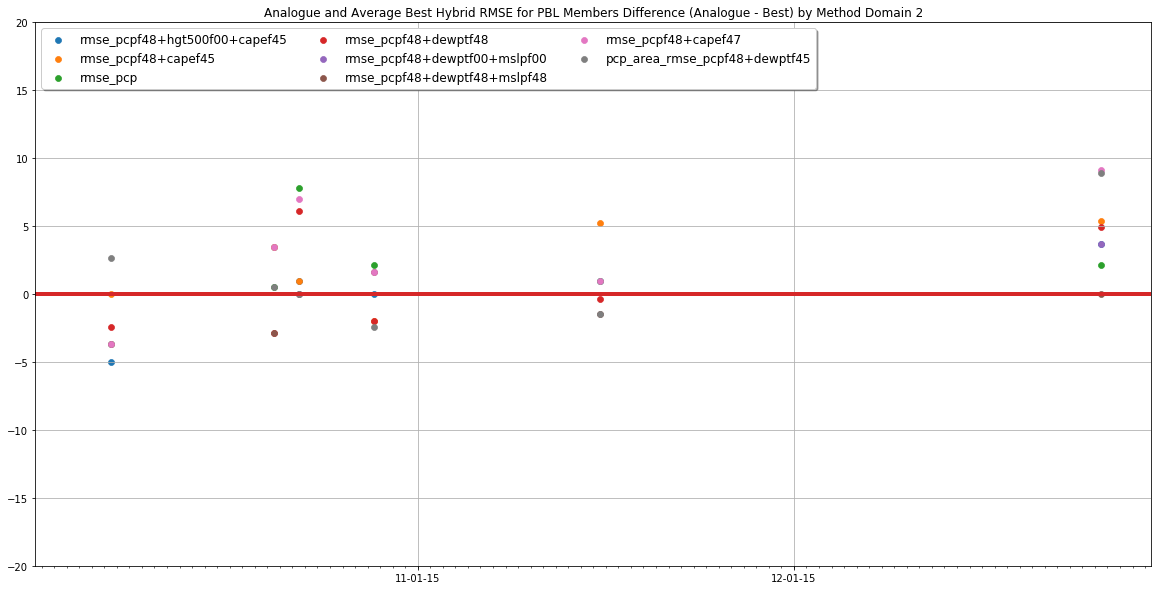

In [45]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 1, 1)
for method in d2methods:
    data_an = np.load('/lustre/work/twixtrom/analogue_analysis/domain2/'+method+'/'+method+'_rmse_an_pbl.npy')
    data_best = np.load('/lustre/work/twixtrom/analogue_analysis/domain2/'+method+'/'+method+'_rmse_best_pbl.npy')
    diff_rmse_pbl = data_best - data_an
    plt.scatter(fdates, diff_rmse_pbl,
             label=method,
             linewidth=0.7)
plt.ylim(-20, 20)
plt.title('Analogue and Average Best Hybrid RMSE for PBL Members Difference (Analogue - Best) by Method Domain 2')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d-%y'))
ax.xaxis.set_minor_locator(mdates.DayLocator())
ax.axhline(linewidth=4, color='tab:red')
plt.xlim(pd.Timestamp('2015-10-01T12:00:00'), pd.Timestamp('2015-12-29T12:00:00'))
plt.legend(shadow=True, fontsize='large', loc=2, ncol=3)
plt.grid()
plt.show()

In [46]:
methods_f36 = [
    "rmse_pcpf36+hgt500f00+capef33",
    "rmse_pcpf36+capef33",
    "rmse_pcpf36",
    "rmse_pcpf36+dewptf36",
    "rmse_pcpf36+dewptf00+mslpf00",
    "rmse_pcpf36+dewptf36+mslpf36",
    "pcp_area_rmse_pcpf36+dewptf33",
]

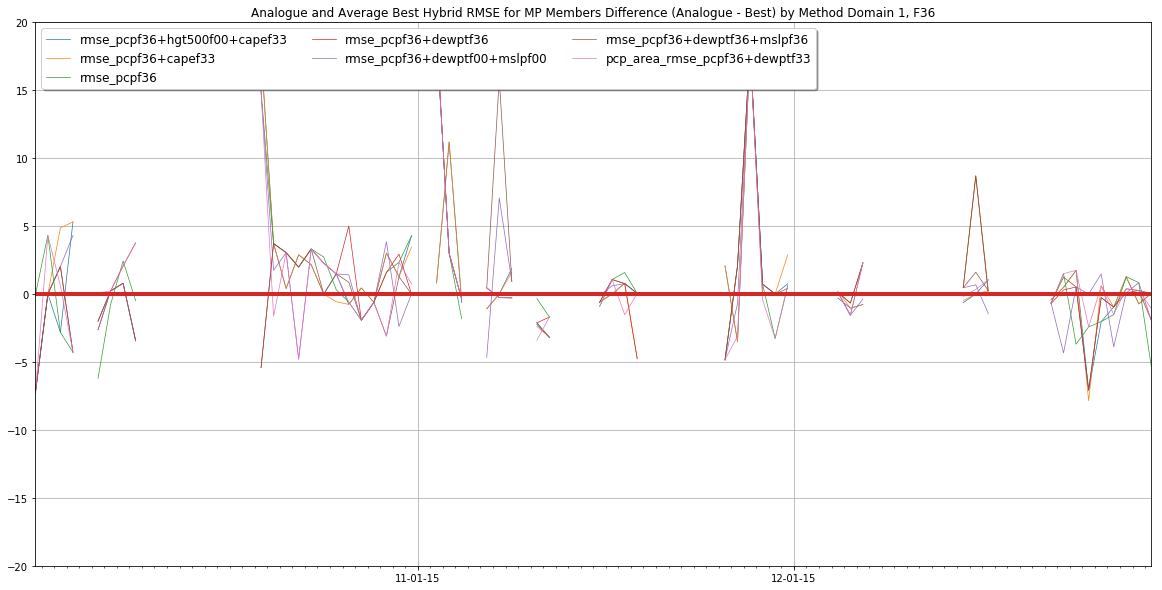

In [47]:
# Same as d01 above but for forecast hour 36
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 1, 1)
for method in methods_f36:
    data_an = np.load('/lustre/work/twixtrom/analogue_analysis/domain1/'+method+'/'+method+'_rmse_an_mp.npy')
    data_best = np.load('/lustre/work/twixtrom/analogue_analysis/domain1/'+method+'/'+method+'_rmse_best_mp.npy')
    diff_rmse_mp = data_best - data_an
    plt.plot(fdates, diff_rmse_mp,
             label=method,
             linewidth=0.7)
plt.ylim(-20, 20)
plt.title('Analogue and Average Best Hybrid RMSE for MP Members Difference (Analogue - Best) by Method Domain 1, F36')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d-%y'))
ax.xaxis.set_minor_locator(mdates.DayLocator())
ax.axhline(linewidth=4, color='tab:red')
plt.xlim(pd.Timestamp('2015-10-01T12:00:00'), pd.Timestamp('2015-12-29T12:00:00'))
plt.legend(shadow=True, fontsize='large', loc=2, ncol=3)
plt.grid()
plt.show()

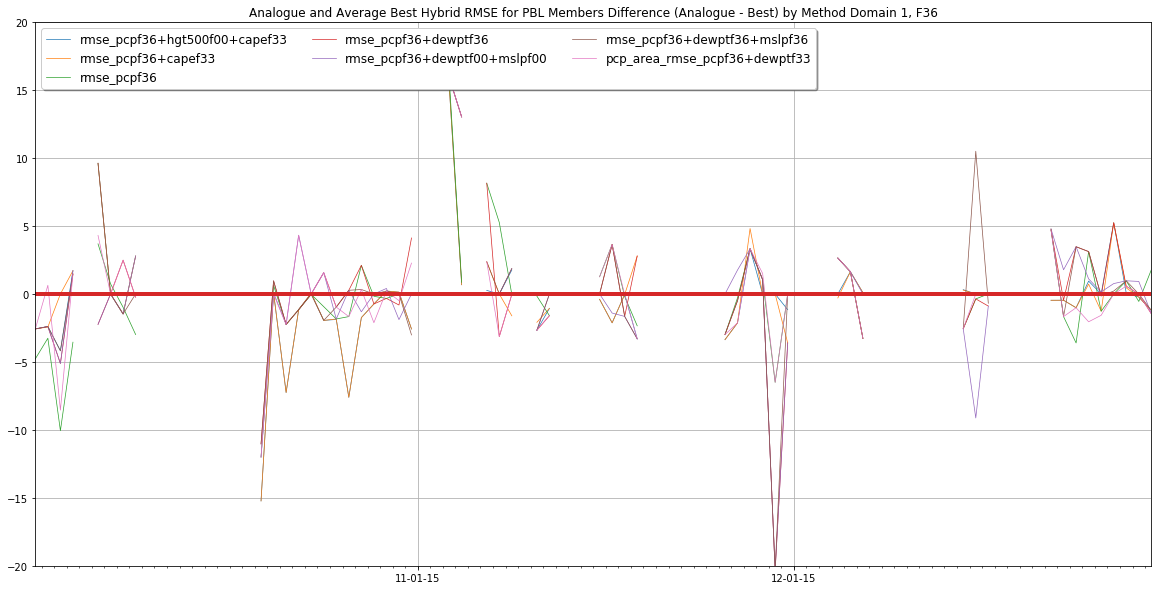

In [48]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 1, 1)
for method in methods_f36:
    data_an = np.load('/lustre/work/twixtrom/analogue_analysis/domain1/'+method+'/'+method+'_rmse_an_pbl.npy')
    data_best = np.load('/lustre/work/twixtrom/analogue_analysis/domain1/'+method+'/'+method+'_rmse_best_pbl.npy')
    diff_rmse_pbl = data_best - data_an
    plt.plot(fdates, diff_rmse_pbl,
             label=method,
             linewidth=0.7)
plt.ylim(-20, 20)
plt.title('Analogue and Average Best Hybrid RMSE for PBL Members Difference (Analogue - Best) by Method Domain 1, F36')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d-%y'))
ax.xaxis.set_minor_locator(mdates.DayLocator())
ax.axhline(linewidth=4, color='tab:red')
plt.xlim(pd.Timestamp('2015-10-01T12:00:00'), pd.Timestamp('2015-12-29T12:00:00'))
plt.legend(shadow=True, fontsize='large', loc=2, ncol=3)
plt.grid()
plt.show()

### Plot Method for d01, Same Analogue Date for MP and PBL ###

All methods are used to calculate the analogue, same date is considered for both MP and PBL members, verification and analogue comparison uses RMSE for entire grid

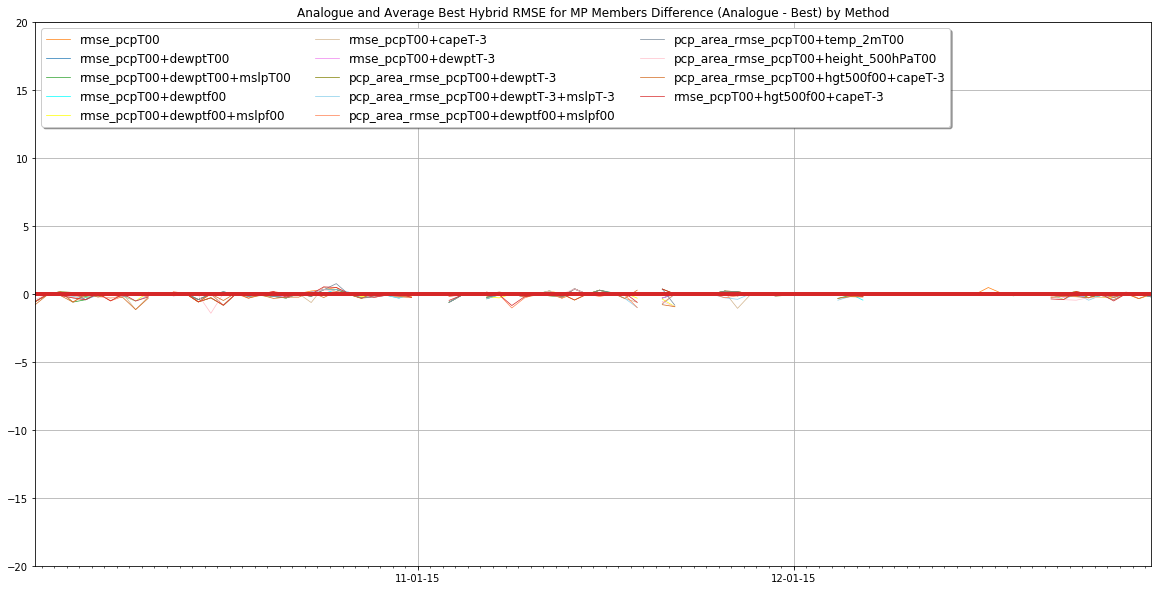

In [49]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 1, 1)
for i in range(len(methods)):
    data_an = np.load('/lustre/work/twixtrom/analogue_analysis_grid_rmse/f48/domain1/'+methods[i]+'/'+methods[i]+'_rmse_an_mp.npy')
    data_best = np.load('/lustre/work/twixtrom/analogue_analysis_grid_rmse/f48/domain1/'+methods[i]+'/'+methods[i]+'_rmse_best_mp.npy')
    diff_rmse_mp = data_best - data_an
    plt.plot(fdates, diff_rmse_mp, color=mem_colors[i],
             label=methods[i],
             linewidth=0.7)
plt.ylim(-20, 20)
plt.title('Analogue and Average Best Hybrid RMSE for MP Members Difference (Analogue - Best) by Method')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d-%y'))
ax.xaxis.set_minor_locator(mdates.DayLocator())
ax.axhline(linewidth=4, color='tab:red')
plt.xlim(pd.Timestamp('2015-10-01T12:00:00'), pd.Timestamp('2015-12-29T12:00:00'))
plt.legend(shadow=True, fontsize='large', loc=2, ncol=3)
plt.grid()
plt.show()

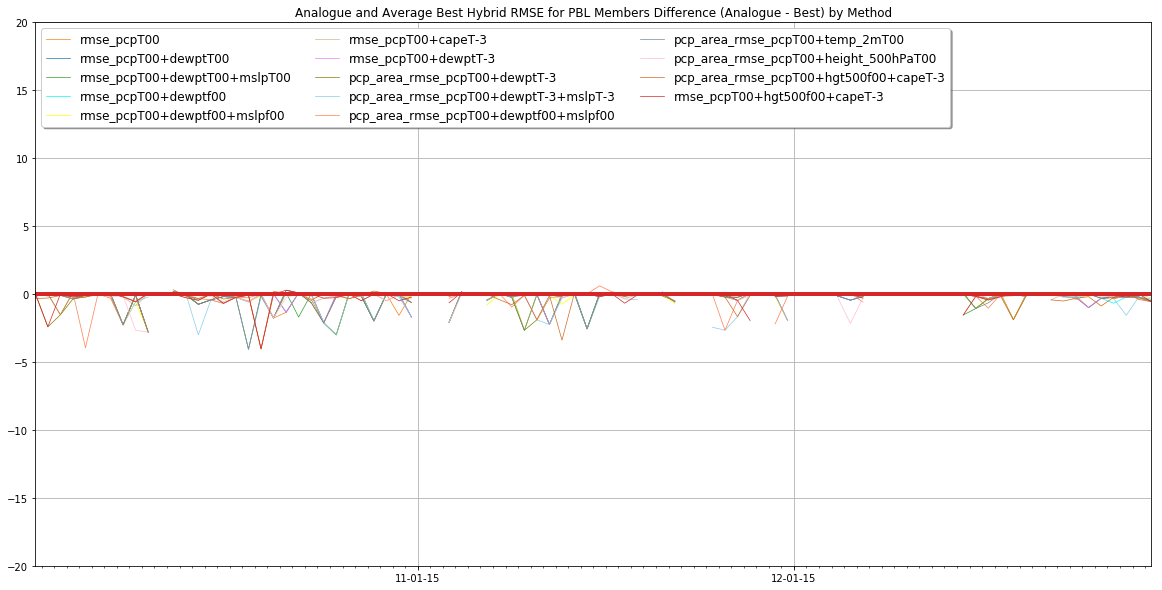

In [50]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 1, 1)
for i in range(len(methods)):
    data_an = np.load('/lustre/work/twixtrom/analogue_analysis_grid_rmse/f48/domain1/'+methods[i]+'/'+methods[i]+'_rmse_an_pbl.npy')
    data_best = np.load('/lustre/work/twixtrom/analogue_analysis_grid_rmse/f48/domain1/'+methods[i]+'/'+methods[i]+'_rmse_best_pbl.npy')
    diff_rmse_mp = data_best - data_an
    plt.plot(fdates, diff_rmse_mp, color=mem_colors[i],
             label=methods[i],
             linewidth=0.7)
plt.ylim(-20, 20)
plt.title('Analogue and Average Best Hybrid RMSE for PBL Members Difference (Analogue - Best) by Method')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d-%y'))
ax.xaxis.set_minor_locator(mdates.DayLocator())
ax.axhline(linewidth=4, color='tab:red')
plt.legend(shadow=True, fontsize='large', loc=2, ncol=3)
plt.xlim(pd.Timestamp('2015-10-01T12:00:00'), pd.Timestamp('2015-12-29T12:00:00'))
plt.grid()
plt.show()

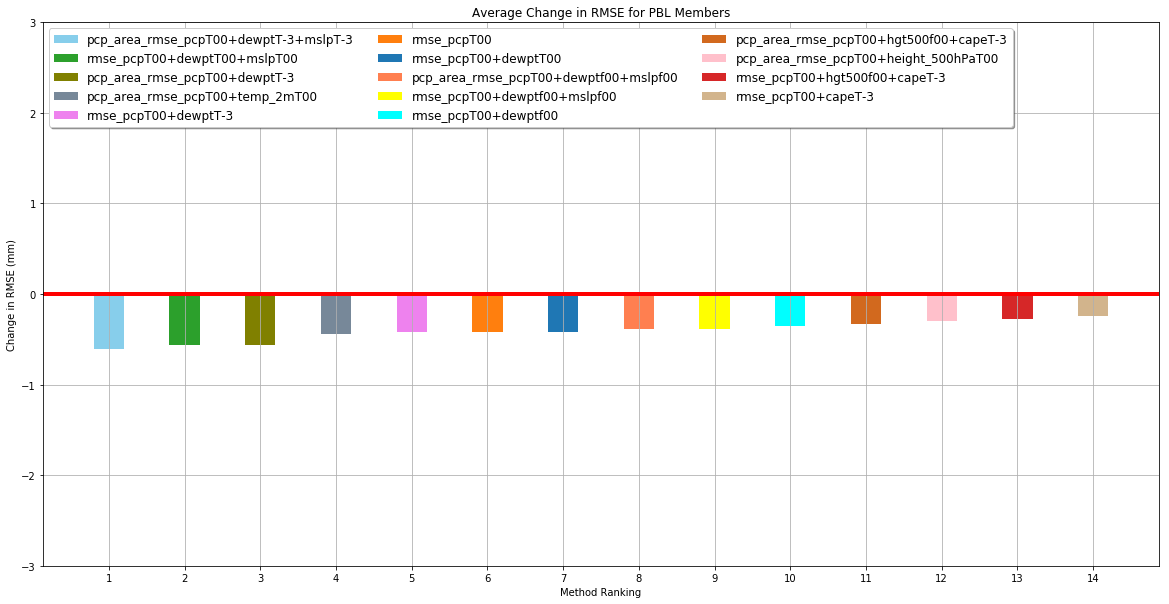

In [51]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 1, 1)
mean_rmse_change = []
i = 0
for method in methods:
    data_an = np.load('/lustre/work/twixtrom/analogue_analysis_grid_rmse/f48/domain1/'+method+'/'+method+'_rmse_an_pbl.npy')
    data_best = np.load('/lustre/work/twixtrom/analogue_analysis_grid_rmse/f48/domain1/'+method+'/'+method+'_rmse_best_pbl.npy')
    mean_rmse_change.append(np.nanmean(data_best - data_an))

sort = np.argsort(np.array(mean_rmse_change))
rmse_change_sorted = np.array(mean_rmse_change)[sort]
methods_sorted = np.array(methods)[sort]
colors_sorted = np.array(mem_colors)[sort]
for i in range(len(methods)):
    plt.bar(i+1, np.array(rmse_change_sorted[i]), 0.4, label=methods_sorted[i], color=colors_sorted[i])

plt.ylim(-3, 3)
plt.xticks(range(1, 15))
plt.title('Average Change in RMSE for PBL Members')
plt.ylabel('Change in RMSE (mm)')
plt.xlabel('Method Ranking')
ax.axhline(linewidth=4, color='red')
plt.legend(shadow=True, fontsize='large', loc=2, ncol=3)
plt.grid()
plt.show()

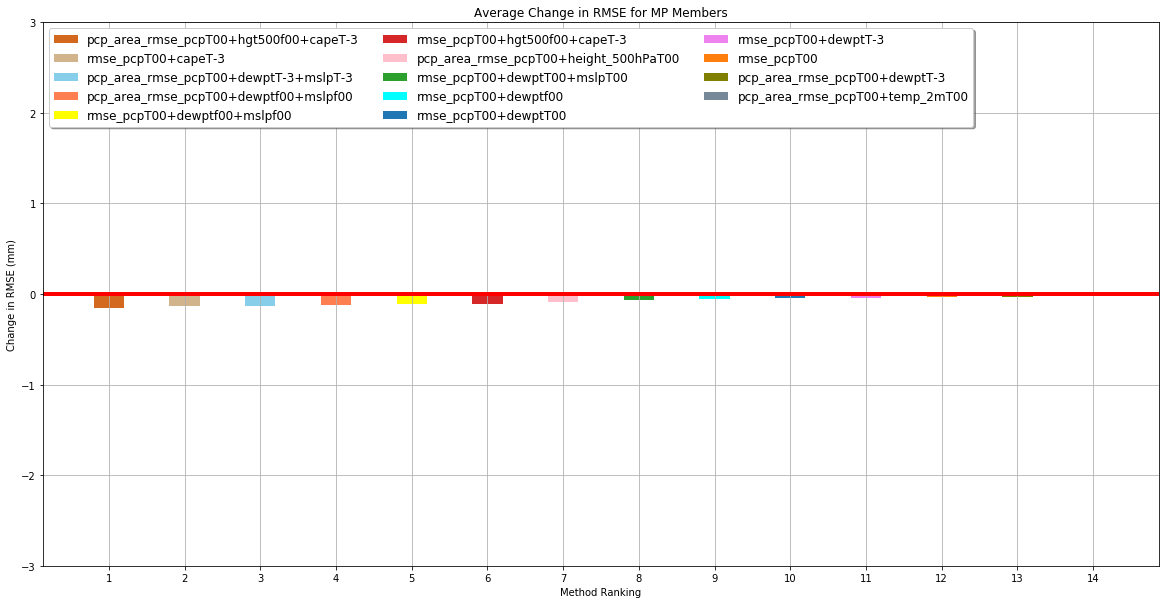

In [52]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 1, 1)
mean_rmse_change = []
i = 0
for method in methods:
    data_an = np.load('/lustre/work/twixtrom/analogue_analysis_grid_rmse/f48/domain1/'+method+'/'+method+'_rmse_an_mp.npy')
    data_best = np.load('/lustre/work/twixtrom/analogue_analysis_grid_rmse/f48/domain1/'+method+'/'+method+'_rmse_best_mp.npy')
    mean_rmse_change.append(np.nanmean(data_best - data_an))

sort = np.argsort(np.array(mean_rmse_change))
rmse_change_sorted = np.array(mean_rmse_change)[sort]
methods_sorted = np.array(methods)[sort]
colors_sorted = np.array(mem_colors)[sort]
for i in range(len(methods)):
    plt.bar(i+1, np.array(rmse_change_sorted[i]), 0.4, label=methods_sorted[i], color=colors_sorted[i])

plt.ylim(-3, 3)
plt.xticks(range(1, 15))
plt.ylabel('Change in RMSE (mm)')
plt.xlabel('Method Ranking')
plt.title('Average Change in RMSE for MP Members')
ax.axhline(linewidth=4, color='red')
plt.legend(shadow=True, fontsize='large', loc=2, ncol=3)
plt.grid()
plt.show()

### Plot Method for d01, Same Analogue Date for MP and PBL ###

Verification based on RMSE at points with precip in either forecast or observed

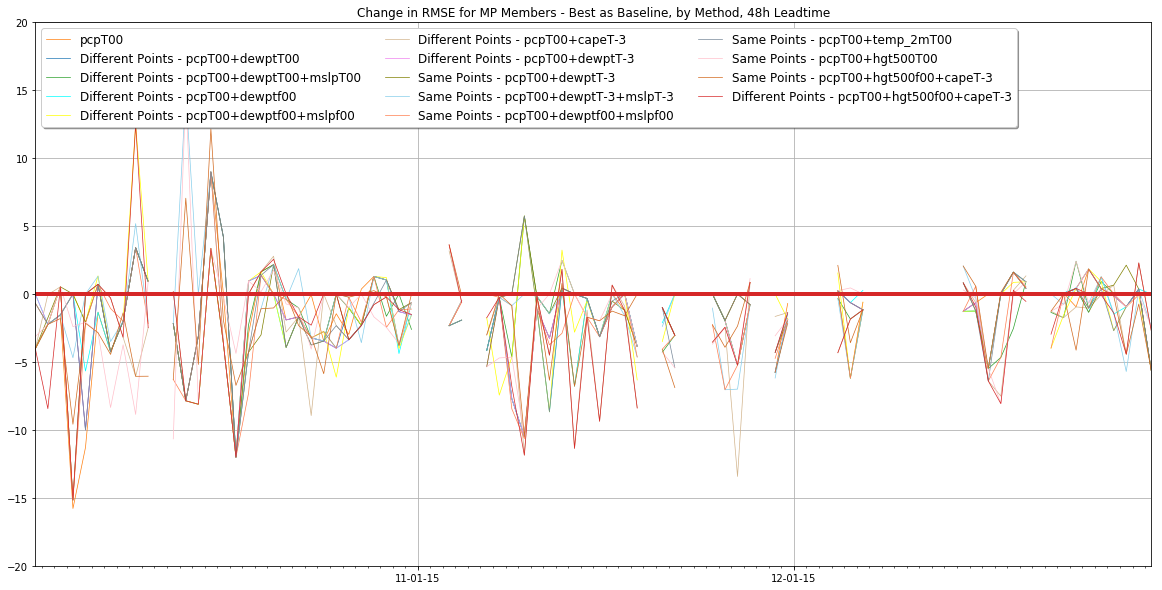

In [53]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 1, 1)
for i in range(len(methods)):
    data_an = np.load('/lustre/work/twixtrom/analogue_analysis_fcst+obs_points_rmse/f48/domain1/'+methods[i]+'/'+methods[i]+'_rmse_an_mp.npy')
    data_best = np.load('/lustre/work/twixtrom/analogue_analysis_fcst+obs_points_rmse/f48/domain1/'+methods[i]+'/'+methods[i]+'_rmse_best_mp.npy')
    diff_rmse_mp = data_best - data_an
    plt.plot(fdates, diff_rmse_mp, color=mem_colors[i],
             label=method_labels[i],
             linewidth=0.7)
plt.ylim(-20, 20)
plt.title('Change in RMSE for MP Members - Best as Baseline, by Method, 48h Leadtime')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d-%y'))
ax.xaxis.set_minor_locator(mdates.DayLocator())
ax.axhline(linewidth=4, color='tab:red')
plt.xlim(pd.Timestamp('2015-10-01T12:00:00'), pd.Timestamp('2015-12-29T12:00:00'))
plt.legend(shadow=True, fontsize='large', loc=2, ncol=3)
plt.grid()
plt.show()

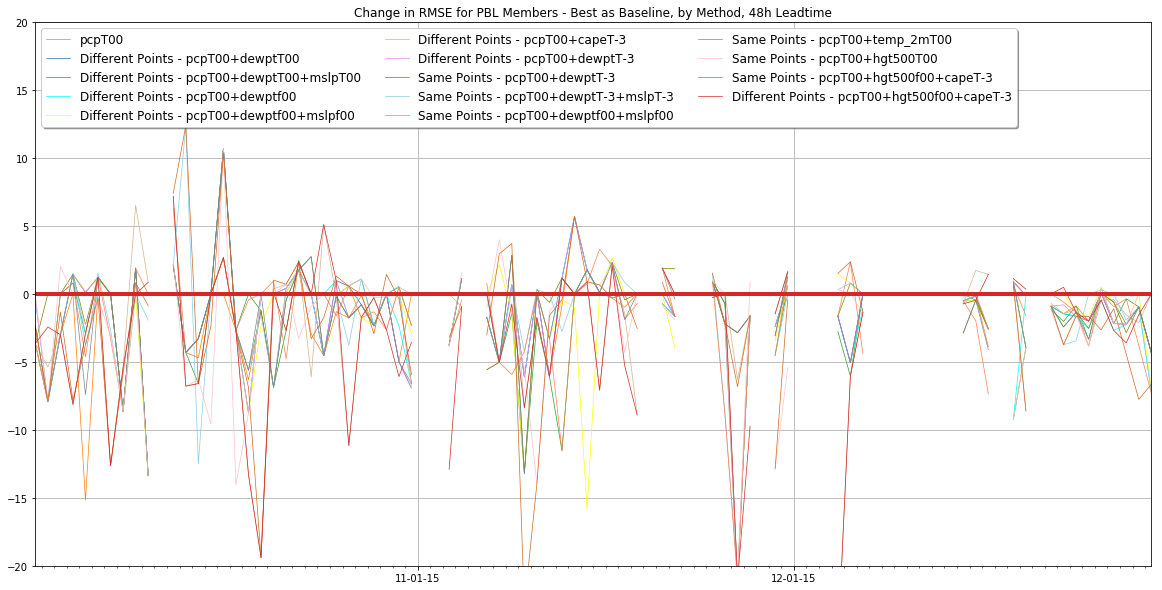

In [54]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 1, 1)
for i in range(len(methods)):
    data_an = np.load('/lustre/work/twixtrom/analogue_analysis_fcst+obs_points_rmse/f48/domain1/'+methods[i]+'/'+methods[i]+'_rmse_an_pbl.npy')
    data_best = np.load('/lustre/work/twixtrom/analogue_analysis_fcst+obs_points_rmse/f48/domain1/'+methods[i]+'/'+methods[i]+'_rmse_best_pbl.npy')
    diff_rmse_mp = data_best - data_an
    plt.plot(fdates, diff_rmse_mp, color=mem_colors[i],
             label=method_labels[i],
             linewidth=0.7)
plt.ylim(-20, 20)
plt.title('Change in RMSE for PBL Members - Best as Baseline, by Method, 48h Leadtime')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d-%y'))
ax.xaxis.set_minor_locator(mdates.DayLocator())
ax.axhline(linewidth=4, color='tab:red')
plt.legend(shadow=True, fontsize='large', loc=2, ncol=3)
plt.xlim(pd.Timestamp('2015-10-01T12:00:00'), pd.Timestamp('2015-12-29T12:00:00'))
plt.grid()
plt.show()

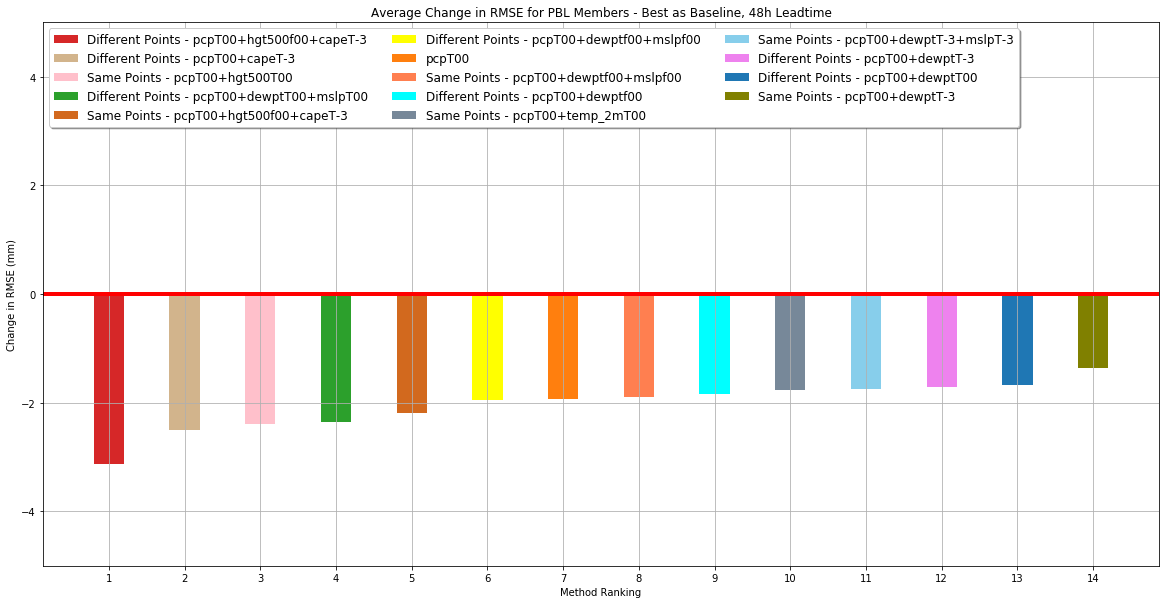

In [55]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 1, 1)
mean_rmse_change = []
i = 0
for method in methods:
    data_an = np.load('/lustre/work/twixtrom/analogue_analysis_fcst+obs_points_rmse/f48/domain1/'+method+'/'+method+'_rmse_an_pbl.npy')
    data_best = np.load('/lustre/work/twixtrom/analogue_analysis_fcst+obs_points_rmse/f48/domain1/'+method+'/'+method+'_rmse_best_pbl.npy')
    mean_rmse_change.append(np.nanmean(data_best - data_an))

sort = np.argsort(np.array(mean_rmse_change))
rmse_change_sorted = np.array(mean_rmse_change)[sort]
methods_sorted = np.array(method_labels)[sort]
colors_sorted = np.array(mem_colors)[sort]
for i in range(len(methods)):
    plt.bar(i+1, np.array(rmse_change_sorted[i]), 0.4, label=methods_sorted[i], color=colors_sorted[i])

plt.ylim(-5, 5)
plt.xticks(range(1, 15))
plt.title('Average Change in RMSE for PBL Members - Best as Baseline, 48h Leadtime')
plt.ylabel('Change in RMSE (mm)')
plt.xlabel('Method Ranking')
ax.axhline(linewidth=4, color='red')
plt.legend(shadow=True, fontsize='large', loc=2, ncol=3)
plt.grid()
plt.show()

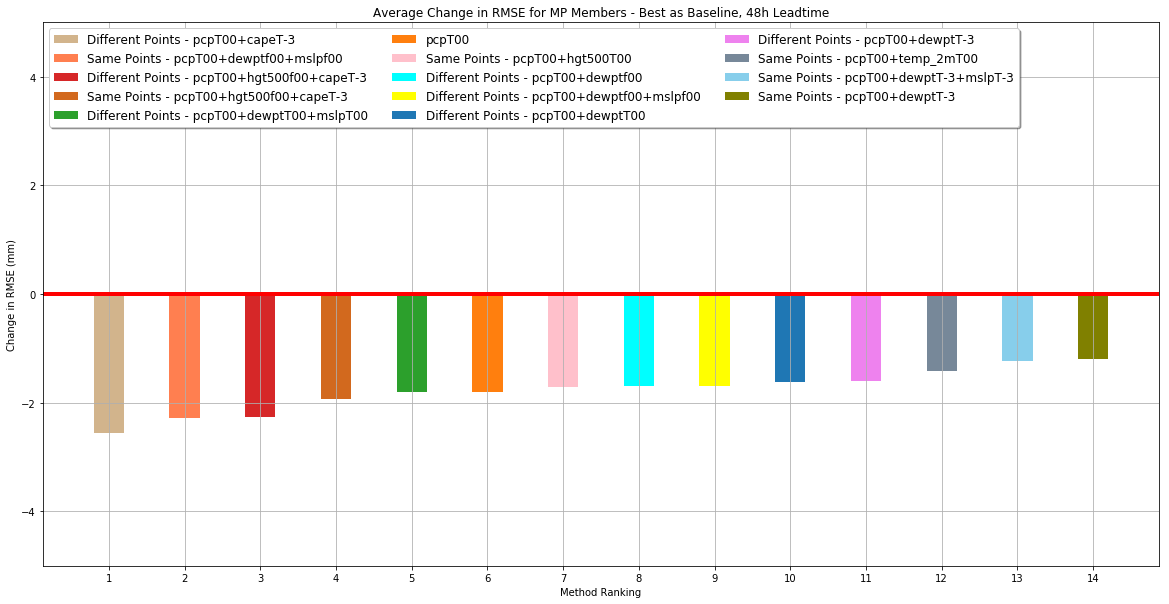

In [56]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 1, 1)
mean_rmse_change = []
i = 0
for method in methods:
    data_an = np.load('/lustre/work/twixtrom/analogue_analysis_fcst+obs_points_rmse/f48/domain1/'+method+'/'+method+'_rmse_an_mp.npy')
    data_best = np.load('/lustre/work/twixtrom/analogue_analysis_fcst+obs_points_rmse/f48/domain1/'+method+'/'+method+'_rmse_best_mp.npy')
    mean_rmse_change.append(np.nanmean(data_best - data_an))

sort = np.argsort(np.array(mean_rmse_change))
rmse_change_sorted = np.array(mean_rmse_change)[sort]
methods_sorted = np.array(method_labels)[sort]
colors_sorted = np.array(mem_colors)[sort]
for i in range(len(methods)):
    plt.bar(i+1, np.array(rmse_change_sorted[i]), 0.4, label=methods_sorted[i], color=colors_sorted[i])

plt.ylim(-5, 5)
plt.xticks(range(1, 15))
plt.ylabel('Change in RMSE (mm)')
plt.xlabel('Method Ranking')
plt.title('Average Change in RMSE for MP Members - Best as Baseline, 48h Leadtime')
ax.axhline(linewidth=4, color='red')
plt.legend(shadow=True, fontsize='large', loc=2, ncol=3)
plt.grid()
plt.show()

### Plot Method for d01, Same Analogue Date for MP and PBL, 12h Forecasts ###

Verification based on RMSE at points with precip in either forecast or observed

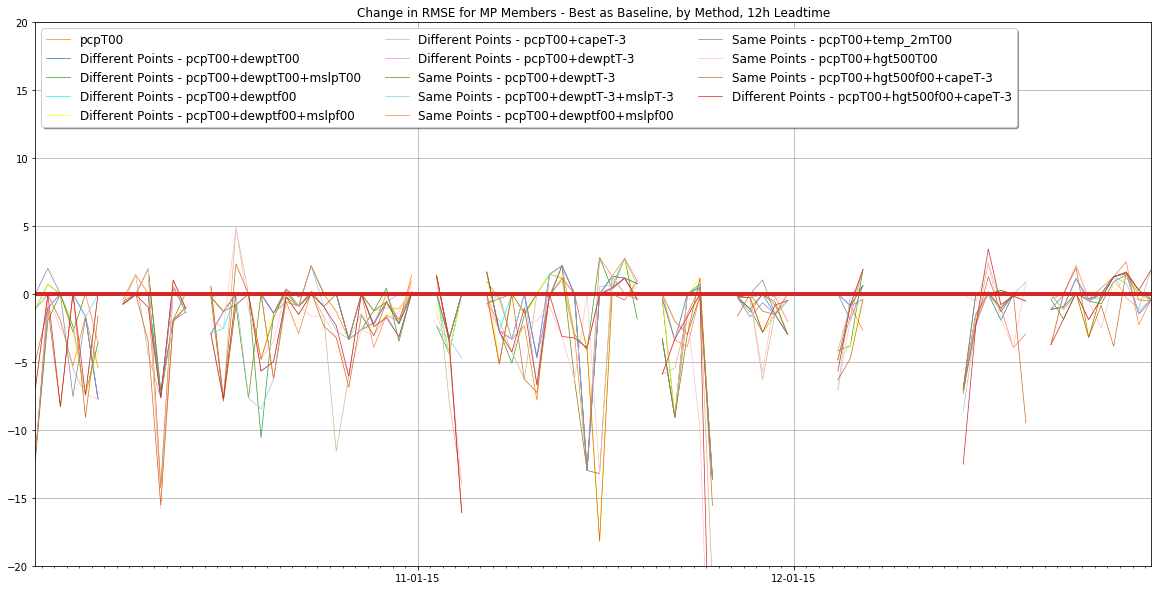

In [57]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 1, 1)
for i in range(len(methods)):
    data_an = np.load('/lustre/work/twixtrom/analogue_analysis_fcst+obs_points_rmse/f12/domain1/'+methods[i]+'/'+methods[i]+'_rmse_an_mp.npy')
    data_best = np.load('/lustre/work/twixtrom/analogue_analysis_fcst+obs_points_rmse/f12/domain1/'+methods[i]+'/'+methods[i]+'_rmse_best_mp.npy')
    diff_rmse_mp = data_best - data_an
    plt.plot(fdates, diff_rmse_mp, color=mem_colors[i],
             label=method_labels[i],
             linewidth=0.7)
plt.ylim(-20, 20)
plt.title('Change in RMSE for MP Members - Best as Baseline, by Method, 12h Leadtime')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d-%y'))
ax.xaxis.set_minor_locator(mdates.DayLocator())
ax.axhline(linewidth=4, color='tab:red')
plt.xlim(pd.Timestamp('2015-10-01T12:00:00'), pd.Timestamp('2015-12-29T12:00:00'))
plt.legend(shadow=True, fontsize='large', loc=2, ncol=3)
plt.grid()
plt.show()

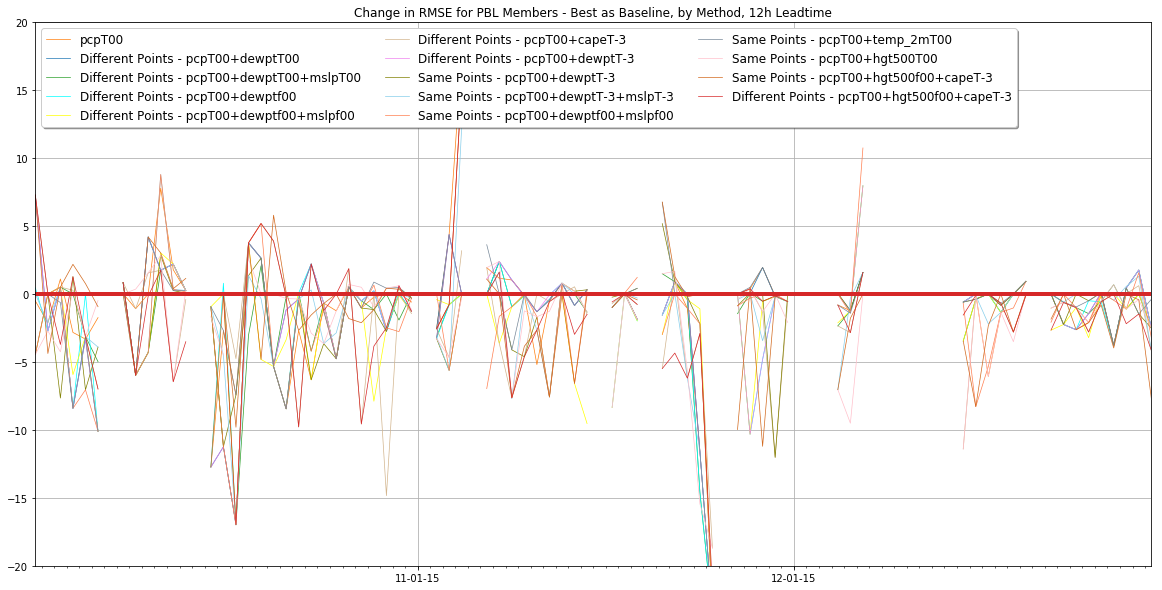

In [58]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 1, 1)
for i in range(len(methods)):
    data_an = np.load('/lustre/work/twixtrom/analogue_analysis_fcst+obs_points_rmse/f12/domain1/'+methods[i]+'/'+methods[i]+'_rmse_an_pbl.npy')
    data_best = np.load('/lustre/work/twixtrom/analogue_analysis_fcst+obs_points_rmse/f12/domain1/'+methods[i]+'/'+methods[i]+'_rmse_best_pbl.npy')
    diff_rmse_mp = data_best - data_an
    plt.plot(fdates, diff_rmse_mp, color=mem_colors[i],
             label=method_labels[i],
             linewidth=0.7)
plt.ylim(-20, 20)
plt.title('Change in RMSE for PBL Members - Best as Baseline, by Method, 12h Leadtime')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d-%y'))
ax.xaxis.set_minor_locator(mdates.DayLocator())
ax.axhline(linewidth=4, color='tab:red')
plt.legend(shadow=True, fontsize='large', loc=2, ncol=3)
plt.xlim(pd.Timestamp('2015-10-01T12:00:00'), pd.Timestamp('2015-12-29T12:00:00'))
plt.grid()
plt.show()

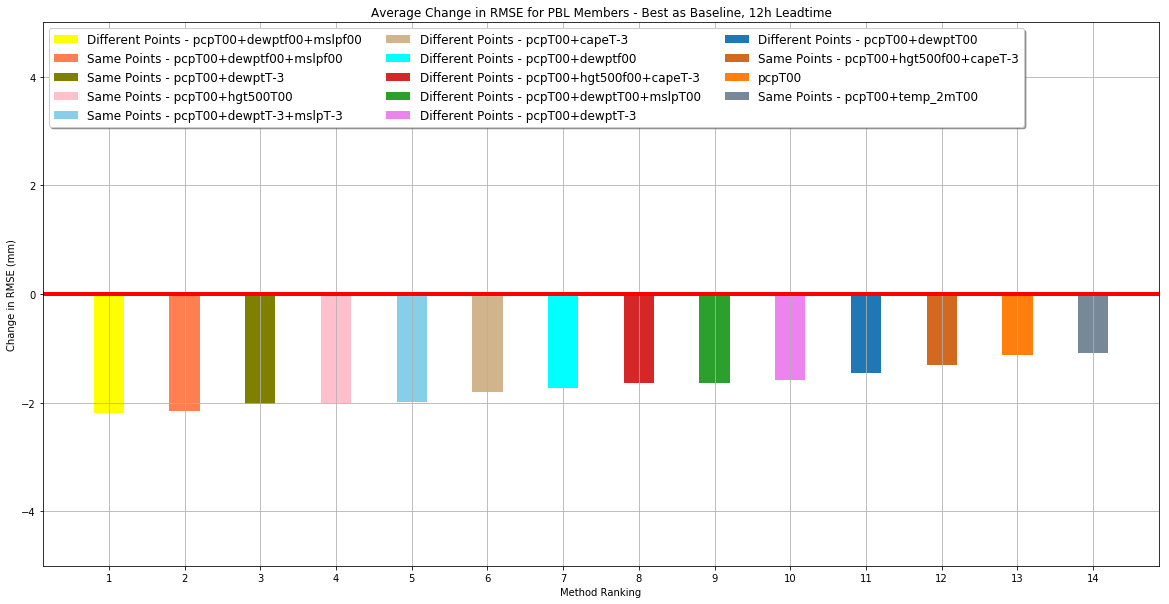

In [59]:
fig = plt.figure(figsize=(20, 10), facecolor='white')
ax = fig.add_subplot(1, 1, 1)
mean_rmse_change = []
i = 0
for method in methods:
    data_an = np.load('/lustre/work/twixtrom/analogue_analysis_fcst+obs_points_rmse/f12/domain1/'+method+'/'+method+'_rmse_an_pbl.npy')
    data_best = np.load('/lustre/work/twixtrom/analogue_analysis_fcst+obs_points_rmse/f12/domain1/'+method+'/'+method+'_rmse_best_pbl.npy')
    mean_rmse_change.append(np.nanmean(data_best - data_an))

sort = np.argsort(np.array(mean_rmse_change))
rmse_change_sorted = np.array(mean_rmse_change)[sort]
methods_sorted = np.array(method_labels)[sort]
colors_sorted = np.array(mem_colors)[sort]
for i in range(len(methods)):
    plt.bar(i+1, np.array(rmse_change_sorted[i]), 0.4, label=methods_sorted[i], color=colors_sorted[i])

plt.ylim(-5, 5)
plt.xticks(range(1, 15))
plt.title('Average Change in RMSE for PBL Members - Best as Baseline, 12h Leadtime')
plt.ylabel('Change in RMSE (mm)')
plt.xlabel('Method Ranking')
ax.axhline(linewidth=4, color='red')
plt.legend(shadow=True, fontsize='large', loc=2, ncol=3)
plt.grid()
plt.show()

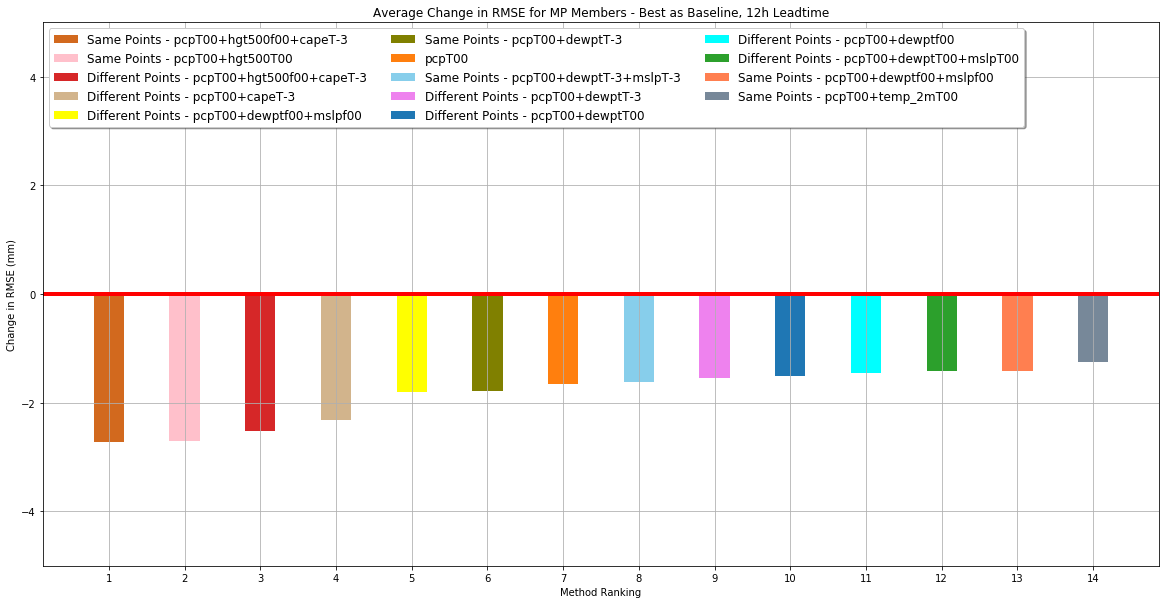

In [60]:
fig = plt.figure(figsize=(20, 10), facecolor='white')
ax = fig.add_subplot(1, 1, 1)
mean_rmse_change = []
i = 0
for method in methods:
    data_an = np.load('/lustre/work/twixtrom/analogue_analysis_fcst+obs_points_rmse/f12/domain1/'+method+'/'+method+'_rmse_an_mp.npy')
    data_best = np.load('/lustre/work/twixtrom/analogue_analysis_fcst+obs_points_rmse/f12/domain1/'+method+'/'+method+'_rmse_best_mp.npy')
    mean_rmse_change.append(np.nanmean(data_best - data_an))

sort = np.argsort(np.array(mean_rmse_change))
rmse_change_sorted = np.array(mean_rmse_change)[sort]
methods_sorted = np.array(method_labels)[sort]
colors_sorted = np.array(mem_colors)[sort]
for i in range(len(methods)):
    plt.bar(i+1, np.array(rmse_change_sorted[i]), 0.4, label=methods_sorted[i], color=colors_sorted[i])

plt.ylim(-5, 5)
plt.xticks(range(1, 15))
plt.ylabel('Change in RMSE (mm)')
plt.xlabel('Method Ranking')
plt.title('Average Change in RMSE for MP Members - Best as Baseline, 12h Leadtime')
ax.axhline(linewidth=4, color='red')
plt.legend(shadow=True, fontsize='large', loc=2, ncol=3)
plt.grid()
plt.show()

### Plot Method for d01, Same Analogue Date for MP and PBL, 24h Forecasts ###

Verification based on RMSE at points with precip in either forecast or observed

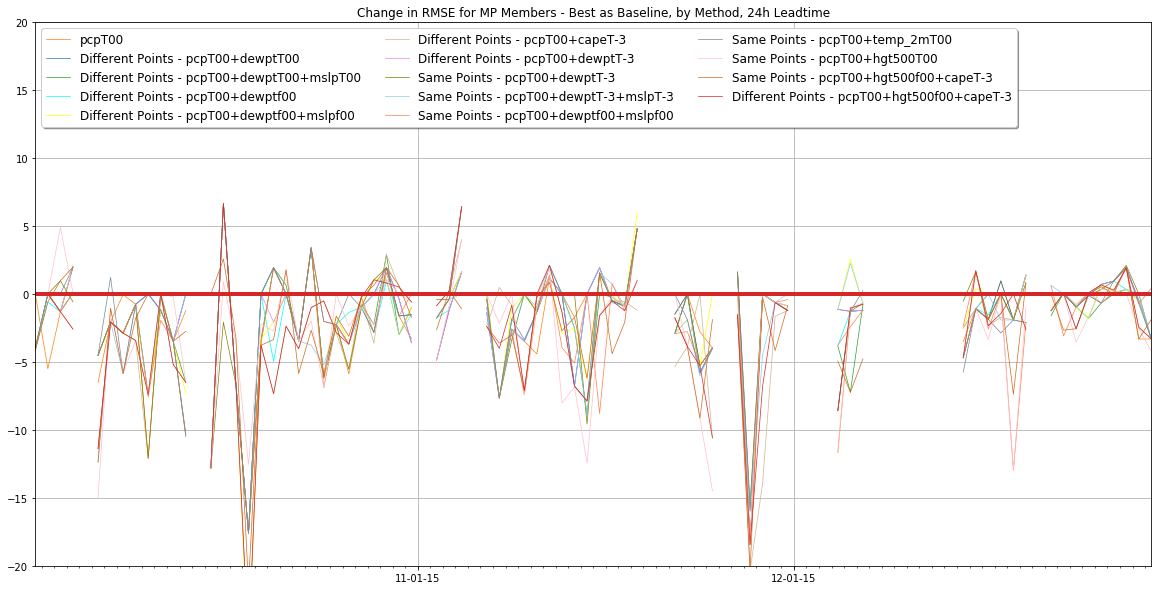

In [61]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 1, 1)
for i in range(len(methods)):
    data_an = np.load('/lustre/work/twixtrom/analogue_analysis_fcst+obs_points_rmse/f24/domain1/'+methods[i]+'/'+methods[i]+'_rmse_an_mp.npy')
    data_best = np.load('/lustre/work/twixtrom/analogue_analysis_fcst+obs_points_rmse/f24/domain1/'+methods[i]+'/'+methods[i]+'_rmse_best_mp.npy')
    diff_rmse_mp = data_best - data_an
    plt.plot(fdates, diff_rmse_mp, color=mem_colors[i],
             label=method_labels[i],
             linewidth=0.7)
plt.ylim(-20, 20)
plt.title('Change in RMSE for MP Members - Best as Baseline, by Method, 24h Leadtime')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d-%y'))
ax.xaxis.set_minor_locator(mdates.DayLocator())
ax.axhline(linewidth=4, color='tab:red')
plt.xlim(pd.Timestamp('2015-10-01T12:00:00'), pd.Timestamp('2015-12-29T12:00:00'))
plt.legend(shadow=True, fontsize='large', loc=2, ncol=3)
plt.grid()
plt.show()

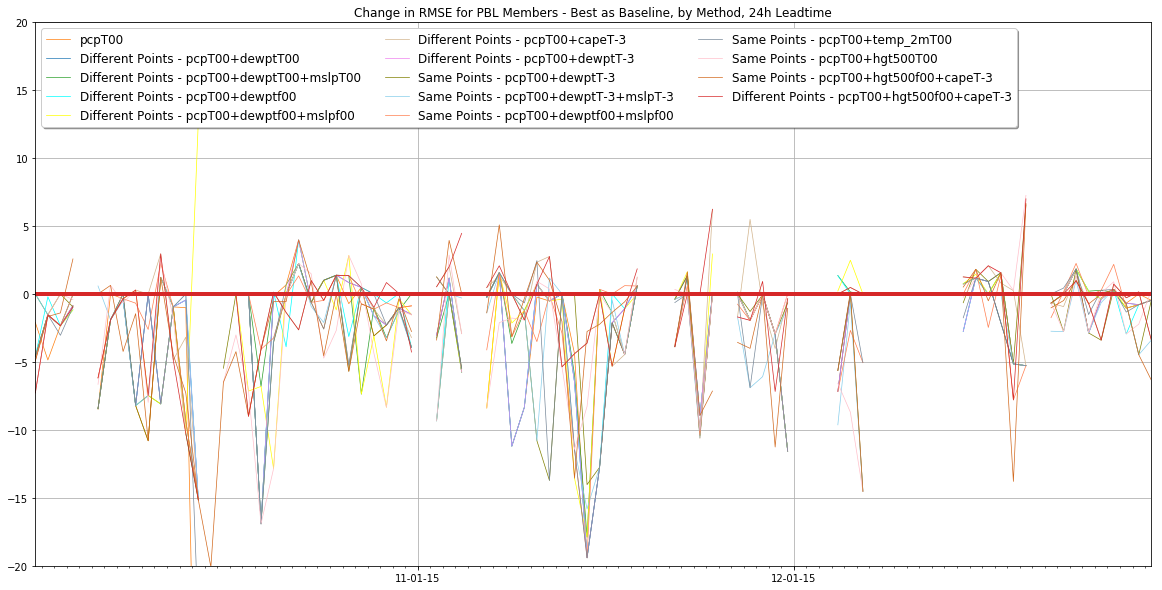

In [62]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 1, 1)
for i in range(len(methods)):
    data_an = np.load('/lustre/work/twixtrom/analogue_analysis_fcst+obs_points_rmse/f24/domain1/'+methods[i]+'/'+methods[i]+'_rmse_an_pbl.npy')
    data_best = np.load('/lustre/work/twixtrom/analogue_analysis_fcst+obs_points_rmse/f24/domain1/'+methods[i]+'/'+methods[i]+'_rmse_best_pbl.npy')
    diff_rmse_mp = data_best - data_an
    plt.plot(fdates, diff_rmse_mp, color=mem_colors[i],
             label=method_labels[i],
             linewidth=0.7)
plt.ylim(-20, 20)
plt.title('Change in RMSE for PBL Members - Best as Baseline, by Method, 24h Leadtime')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d-%y'))
ax.xaxis.set_minor_locator(mdates.DayLocator())
ax.axhline(linewidth=4, color='tab:red')
plt.legend(shadow=True, fontsize='large', loc=2, ncol=3)
plt.xlim(pd.Timestamp('2015-10-01T12:00:00'), pd.Timestamp('2015-12-29T12:00:00'))
plt.grid()
plt.show()

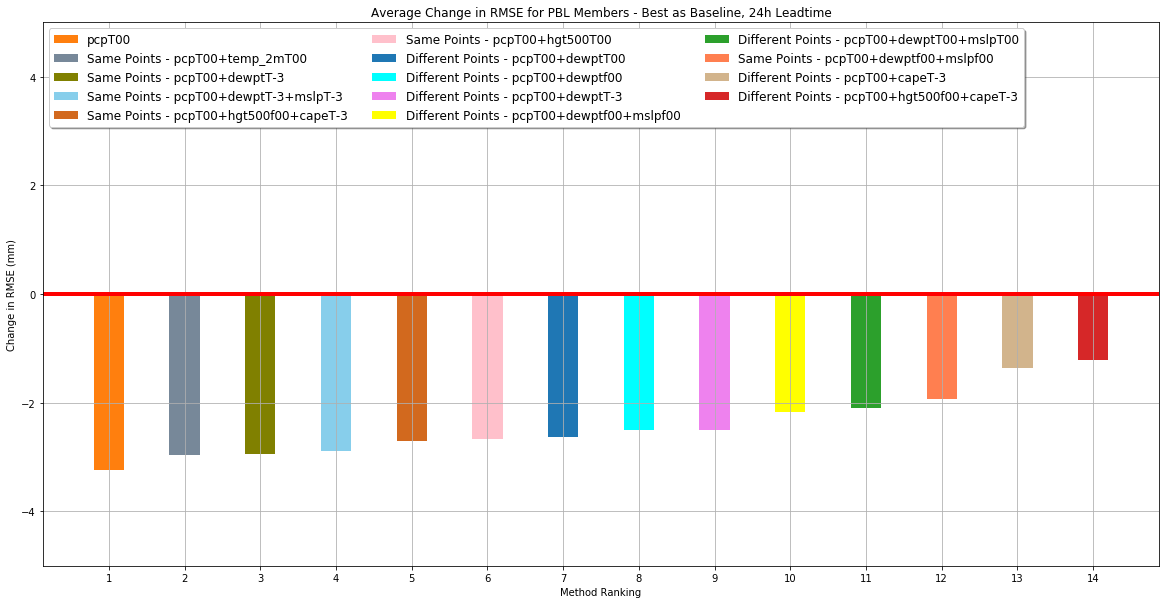

In [63]:
fig = plt.figure(figsize=(20, 10), facecolor='white')
ax = fig.add_subplot(1, 1, 1)
mean_rmse_change = []
i = 0
for method in methods:
    data_an = np.load('/lustre/work/twixtrom/analogue_analysis_fcst+obs_points_rmse/f24/domain1/'+method+'/'+method+'_rmse_an_pbl.npy')
    data_best = np.load('/lustre/work/twixtrom/analogue_analysis_fcst+obs_points_rmse/f24/domain1/'+method+'/'+method+'_rmse_best_pbl.npy')
    mean_rmse_change.append(np.nanmean(data_best - data_an))

sort = np.argsort(np.array(mean_rmse_change))
rmse_change_sorted = np.array(mean_rmse_change)[sort]
methods_sorted = np.array(method_labels)[sort]
labels_sorted = np.array(method_labels)[sort]
colors_sorted = np.array(mem_colors)[sort]
for i in range(len(methods)):
    plt.bar(i+1, np.array(rmse_change_sorted[i]), 0.4, label=labels_sorted[i], color=colors_sorted[i])

plt.ylim(-5, 5)
plt.xticks(range(1, 15))
plt.title('Average Change in RMSE for PBL Members - Best as Baseline, 24h Leadtime')
plt.ylabel('Change in RMSE (mm)')
plt.xlabel('Method Ranking')
ax.axhline(linewidth=4, color='red')
plt.legend(shadow=True, fontsize='large', loc=2, ncol=3)
plt.grid()
plt.show()

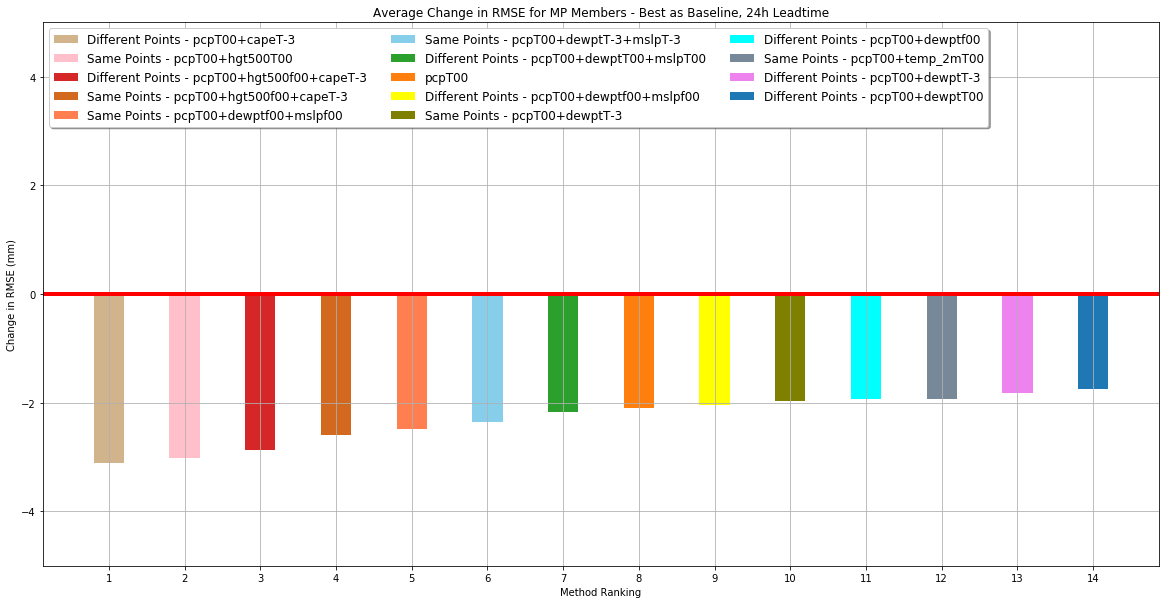

In [64]:
fig = plt.figure(figsize=(20, 10), facecolor='white')
ax = fig.add_subplot(1, 1, 1)
mean_rmse_change = []
i = 0
for method in methods:
    data_an = np.load('/lustre/work/twixtrom/analogue_analysis_fcst+obs_points_rmse/f24/domain1/'+method+'/'+method+'_rmse_an_mp.npy')
    data_best = np.load('/lustre/work/twixtrom/analogue_analysis_fcst+obs_points_rmse/f24/domain1/'+method+'/'+method+'_rmse_best_mp.npy')
    mean_rmse_change.append(np.nanmean(data_best - data_an))

sort = np.argsort(np.array(mean_rmse_change))
rmse_change_sorted = np.array(mean_rmse_change)[sort]
methods_sorted = np.array(methods)[sort]
labels_sorted = np.array(method_labels)[sort]
colors_sorted = np.array(mem_colors)[sort]
for i in range(len(methods)):
    plt.bar(i+1, np.array(rmse_change_sorted[i]), 0.4, label=labels_sorted[i], color=colors_sorted[i])

plt.ylim(-5, 5)
plt.xticks(range(1, 15))
plt.ylabel('Change in RMSE (mm)')
plt.xlabel('Method Ranking')
plt.title('Average Change in RMSE for MP Members - Best as Baseline, 24h Leadtime')
ax.axhline(linewidth=4, color='red')
plt.legend(shadow=True, fontsize='large', loc=2, ncol=3)
plt.grid()
plt.show()

### Plot Method for d01, Same Analogue Date for MP and PBL, 24h Forecasts ###

Compare with mem1

Verification based on RMSE at points with precip in either forecast or observed

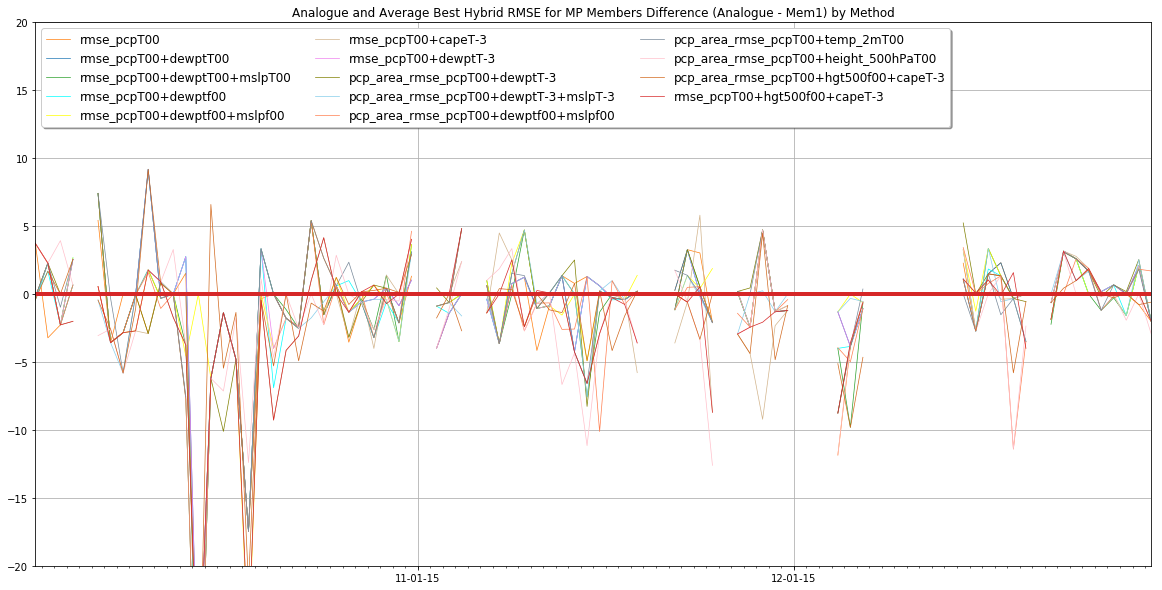

In [65]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 1, 1)
for i in range(len(methods)):
    data_an = np.load('/lustre/work/twixtrom/analogue_analysis_compare_mem1/f24/domain1/'+methods[i]+'/'+methods[i]+'_rmse_an_mp.npy')
    data_best = np.load('/lustre/work/twixtrom/analogue_analysis_compare_mem1/f24/domain1/'+methods[i]+'/'+methods[i]+'_rmse_best_mp.npy')
    diff_rmse_mp = data_best - data_an
    plt.plot(fdates, diff_rmse_mp, color=mem_colors[i],
             label=methods[i],
             linewidth=0.7)
plt.ylim(-20, 20)
plt.title('Analogue and Average Best Hybrid RMSE for MP Members Difference (Analogue - Mem1) by Method')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d-%y'))
ax.xaxis.set_minor_locator(mdates.DayLocator())
ax.axhline(linewidth=4, color='tab:red')
plt.xlim(pd.Timestamp('2015-10-01T12:00:00'), pd.Timestamp('2015-12-29T12:00:00'))
plt.legend(shadow=True, fontsize='large', loc=2, ncol=3)
plt.grid()
plt.show()

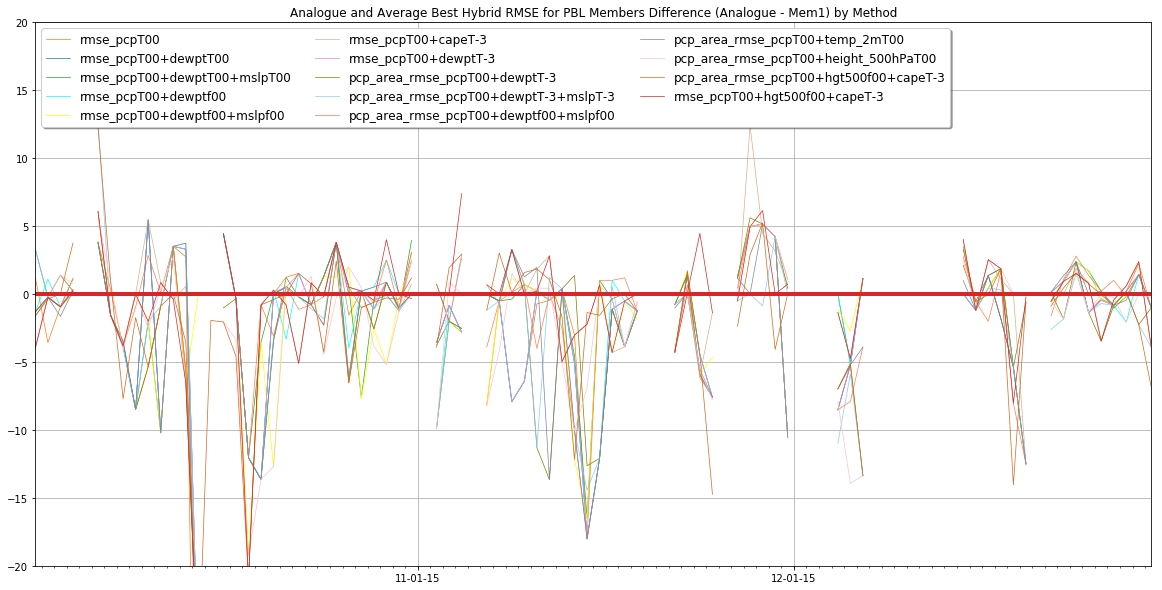

In [66]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 1, 1)
for i in range(len(methods)):
    data_an = np.load('/lustre/work/twixtrom/analogue_analysis_compare_mem1/f24/domain1/'+methods[i]+'/'+methods[i]+'_rmse_an_pbl.npy')
    data_best = np.load('/lustre/work/twixtrom/analogue_analysis_compare_mem1/f24/domain1/'+methods[i]+'/'+methods[i]+'_rmse_best_pbl.npy')
    diff_rmse_mp = data_best - data_an
    plt.plot(fdates, diff_rmse_mp, color=mem_colors[i],
             label=methods[i],
             linewidth=0.7)
plt.ylim(-20, 20)
plt.title('Analogue and Average Best Hybrid RMSE for PBL Members Difference (Analogue - Mem1) by Method')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d-%y'))
ax.xaxis.set_minor_locator(mdates.DayLocator())
ax.axhline(linewidth=4, color='tab:red')
plt.legend(shadow=True, fontsize='large', loc=2, ncol=3)
plt.xlim(pd.Timestamp('2015-10-01T12:00:00'), pd.Timestamp('2015-12-29T12:00:00'))
plt.grid()
plt.show()

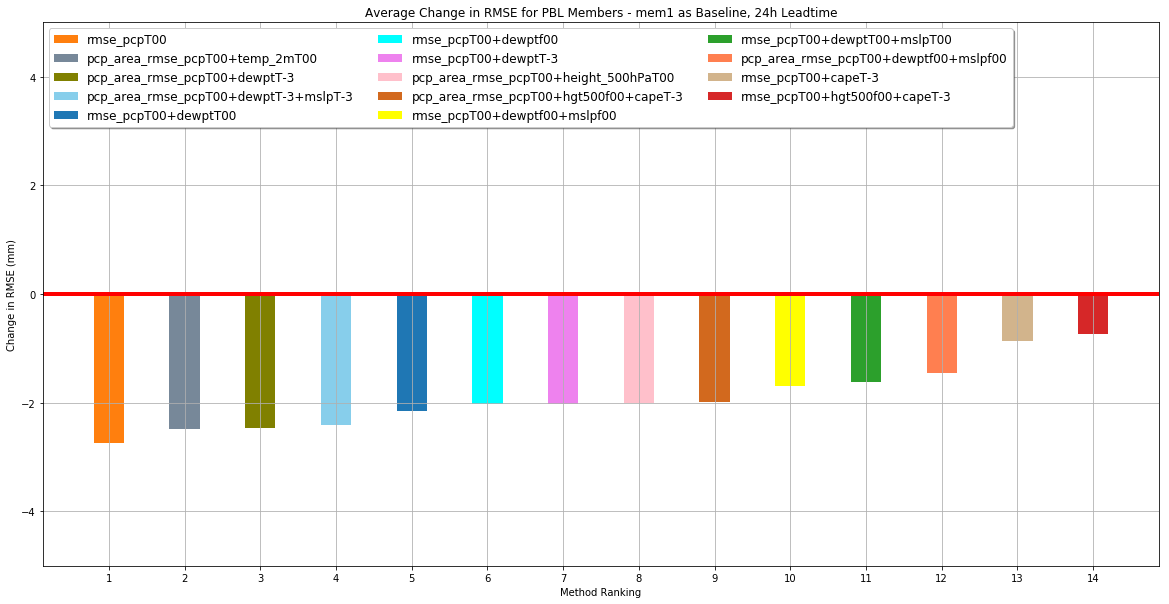

In [67]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 1, 1)
mean_rmse_change = []
i = 0
for method in methods:
    data_an = np.load('/lustre/work/twixtrom/analogue_analysis_compare_mem1/f24/domain1/'+method+'/'+method+'_rmse_an_pbl.npy')
    data_best = np.load('/lustre/work/twixtrom/analogue_analysis_compare_mem1/f24/domain1/'+method+'/'+method+'_rmse_best_pbl.npy')
    mean_rmse_change.append(np.nanmean(data_best - data_an))

sort = np.argsort(np.array(mean_rmse_change))
rmse_change_sorted = np.array(mean_rmse_change)[sort]
methods_sorted = np.array(methods)[sort]
colors_sorted = np.array(mem_colors)[sort]
for i in range(len(methods)):
    plt.bar(i+1, np.array(rmse_change_sorted[i]), 0.4, label=methods_sorted[i], color=colors_sorted[i])

plt.ylim(-5, 5)
plt.xticks(range(1, 15))
plt.title('Average Change in RMSE for PBL Members - mem1 as Baseline, 24h Leadtime')
plt.ylabel('Change in RMSE (mm)')
plt.xlabel('Method Ranking')
ax.axhline(linewidth=4, color='red')
plt.legend(shadow=True, fontsize='large', loc=2, ncol=3)
plt.grid()
plt.show()

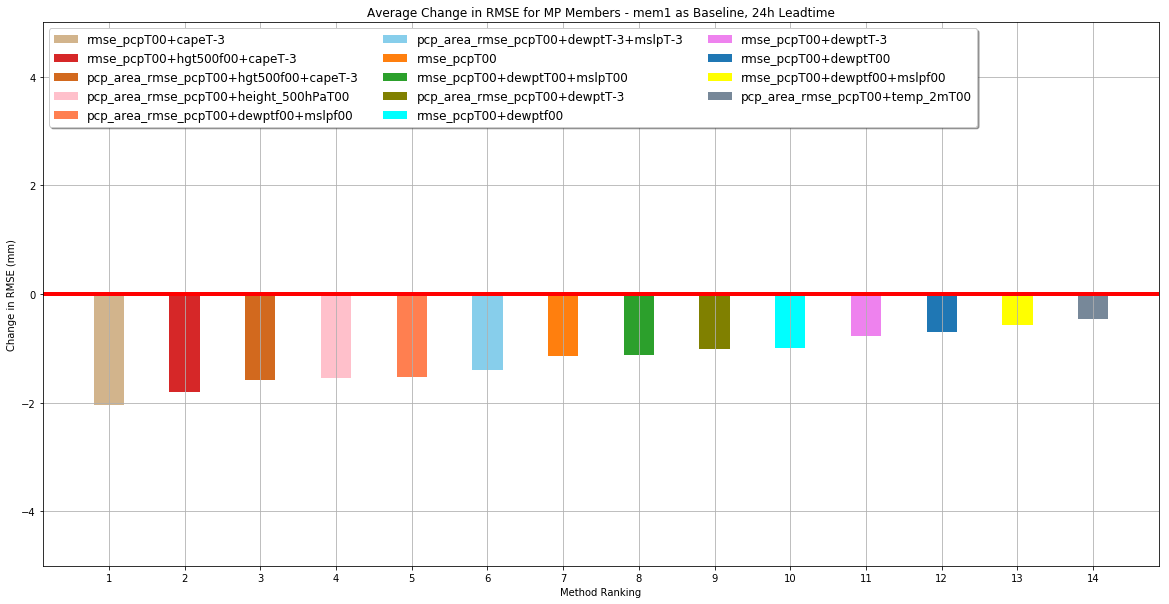

In [68]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 1, 1)
mean_rmse_change = []
i = 0
for method in methods:
    data_an = np.load('/lustre/work/twixtrom/analogue_analysis_compare_mem1/f24/domain1/'+method+'/'+method+'_rmse_an_mp.npy')
    data_best = np.load('/lustre/work/twixtrom/analogue_analysis_compare_mem1/f24/domain1/'+method+'/'+method+'_rmse_best_mp.npy')
    mean_rmse_change.append(np.nanmean(data_best - data_an))

sort = np.argsort(np.array(mean_rmse_change))
rmse_change_sorted = np.array(mean_rmse_change)[sort]
methods_sorted = np.array(methods)[sort]
colors_sorted = np.array(mem_colors)[sort]
for i in range(len(methods)):
    plt.bar(i+1, np.array(rmse_change_sorted[i]), 0.4, label=methods_sorted[i], color=colors_sorted[i])

plt.ylim(-5, 5)
plt.xticks(range(1, 15))
plt.ylabel('Change in RMSE (mm)')
plt.xlabel('Method Ranking')
plt.title('Average Change in RMSE for MP Members - mem1 as Baseline, 24h Leadtime')
ax.axhline(linewidth=4, color='red')
plt.legend(shadow=True, fontsize='large', loc=2, ncol=3)
plt.grid()
plt.show()

## Plot rmse_pcpT00 Method for Multiple Thresholds

In [69]:
thresholds = ['0.1', '1', '5', '10', '20']
thresh_colors = ['tab:orange', 'tab:blue', 'tab:green', 'purple', 'tab:red']

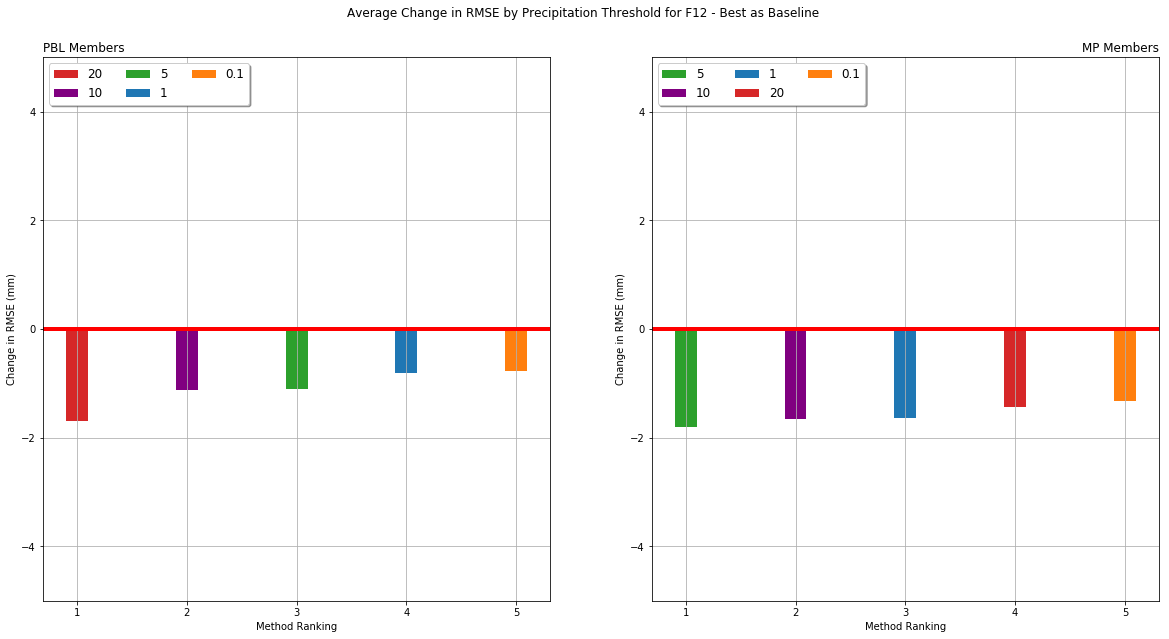

In [70]:
fig = plt.figure(figsize=(20, 10), facecolor='white')
ax = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
mean_rmse_change = []
i = 0
method = 'rmse_pcpT00'
for thresh in thresholds:
    data_an = np.load('/lustre/work/twixtrom/analogue_analysis_thresholds/f12/domain1/'+
                      method+'/'+thresh+'/'+method+'_rmse_an_pbl.npy')
    data_best = np.load('/lustre/work/twixtrom/analogue_analysis_thresholds/f12/domain1/'+
                        method+'/'+thresh+'/'+method+'_rmse_best_pbl.npy')
    mean_rmse_change.append(np.nanmean(data_best - data_an))

sort = np.argsort(np.array(mean_rmse_change))
rmse_change_sorted = np.array(mean_rmse_change)[sort]
thresholds_sorted = np.array(thresholds)[sort]
colors_sorted = np.array(thresh_colors)[sort]
for i in range(len(thresholds)):
    ax.bar(i+1, np.array(rmse_change_sorted[i]), 0.2, label=thresholds_sorted[i], color=colors_sorted[i])

ax.axhline(linewidth=4, color='red')
ax.set_ylim(-5, 5)
plt.xticks(range(1, 6))
ax.set_title('PBL Members', loc='left')
ax.set_ylabel('Change in RMSE (mm)')
ax.set_xlabel('Method Ranking')
ax.grid()
ax.legend(shadow=True, fontsize='large', loc=2, ncol=3)

mean_rmse_change = []
i = 0
method = 'rmse_pcpT00'
for thresh in thresholds:
    data_an = np.load('/lustre/work/twixtrom/analogue_analysis_thresholds/f12/domain1/'+
                      method+'/'+thresh+'/'+method+'_rmse_an_mp.npy')
    data_best = np.load('/lustre/work/twixtrom/analogue_analysis_thresholds/f12/domain1/'+
                        method+'/'+thresh+'/'+method+'_rmse_best_mp.npy')
    mean_rmse_change.append(np.nanmean(data_best - data_an))

sort = np.argsort(np.array(mean_rmse_change))
rmse_change_sorted = np.array(mean_rmse_change)[sort]
thresholds_sorted = np.array(thresholds)[sort]
colors_sorted = np.array(thresh_colors)[sort]
for i in range(len(thresholds)):
    ax2.bar(i+1, np.array(rmse_change_sorted[i]), 0.2, label=thresholds_sorted[i], color=colors_sorted[i])

ax2.set_title('MP Members', loc='right')
ax2.set_ylabel('Change in RMSE (mm)')
ax2.set_xlabel('Method Ranking')
ax2.axhline(linewidth=4, color='red')
ax2.set_ylim(-5, 5)
ax2.legend(shadow=True, fontsize='large', loc=2, ncol=3)
ax2.grid()
plt.suptitle('Average Change in RMSE by Precipitation Threshold for F12 - Best as Baseline', fontsize='large', y=0.95)
plt.show()

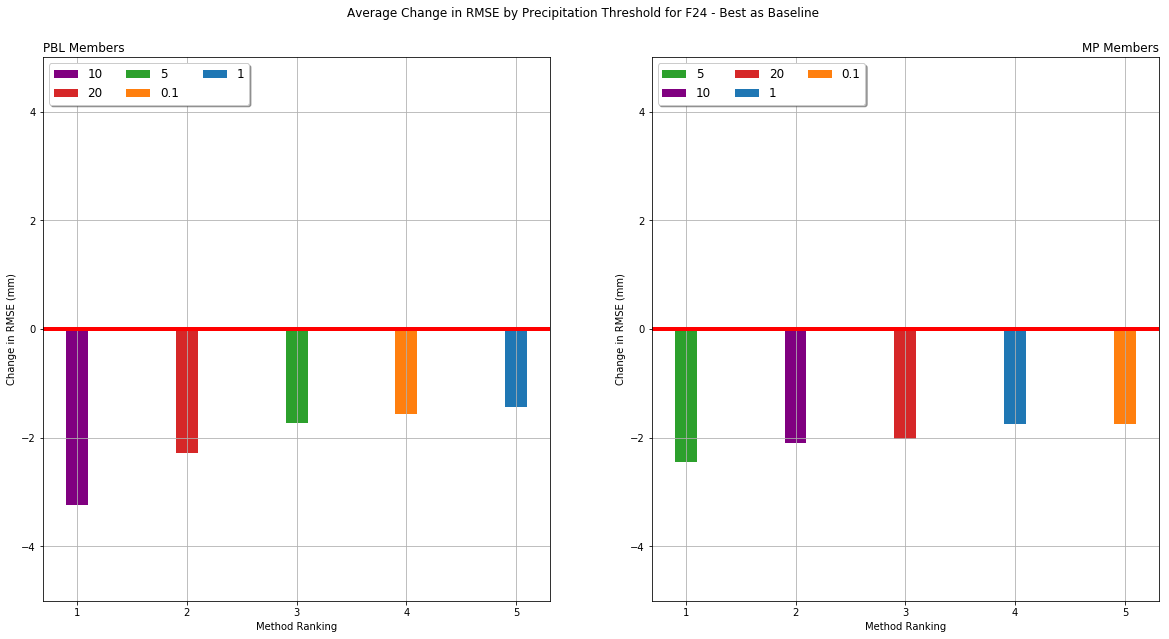

In [71]:
fig = plt.figure(figsize=(20, 10), facecolor='white')
ax = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
mean_rmse_change = []
i = 0
method = 'rmse_pcpT00'
for thresh in thresholds:
    data_an = np.load('/lustre/work/twixtrom/analogue_analysis_thresholds/f24/domain1/'+
                      method+'/'+thresh+'/'+method+'_rmse_an_pbl.npy')
    data_best = np.load('/lustre/work/twixtrom/analogue_analysis_thresholds/f24/domain1/'+
                        method+'/'+thresh+'/'+method+'_rmse_best_pbl.npy')
    mean_rmse_change.append(np.nanmean(data_best - data_an))

sort = np.argsort(np.array(mean_rmse_change))
rmse_change_sorted = np.array(mean_rmse_change)[sort]
thresholds_sorted = np.array(thresholds)[sort]
colors_sorted = np.array(thresh_colors)[sort]
for i in range(len(thresholds)):
    ax.bar(i+1, np.array(rmse_change_sorted[i]), 0.2, label=thresholds_sorted[i], color=colors_sorted[i])

ax.axhline(linewidth=4, color='red')
ax.set_ylim(-5, 5)
plt.xticks(range(1, 6))
ax.set_title('PBL Members', loc='left')
ax.set_ylabel('Change in RMSE (mm)')
ax.set_xlabel('Method Ranking')
ax.grid()
ax.legend(shadow=True, fontsize='large', loc=2, ncol=3)

mean_rmse_change = []
i = 0
method = 'rmse_pcpT00'
for thresh in thresholds:
    data_an = np.load('/lustre/work/twixtrom/analogue_analysis_thresholds/f24/domain1/'+
                      method+'/'+thresh+'/'+method+'_rmse_an_mp.npy')
    data_best = np.load('/lustre/work/twixtrom/analogue_analysis_thresholds/f24/domain1/'+
                        method+'/'+thresh+'/'+method+'_rmse_best_mp.npy')
    mean_rmse_change.append(np.nanmean(data_best - data_an))

sort = np.argsort(np.array(mean_rmse_change))
rmse_change_sorted = np.array(mean_rmse_change)[sort]
thresholds_sorted = np.array(thresholds)[sort]
colors_sorted = np.array(thresh_colors)[sort]
for i in range(len(thresholds)):
    ax2.bar(i+1, np.array(rmse_change_sorted[i]), 0.2, label=thresholds_sorted[i], color=colors_sorted[i])

ax2.set_title('MP Members', loc='right')
ax2.set_ylabel('Change in RMSE (mm)')
ax2.set_xlabel('Method Ranking')
ax2.axhline(linewidth=4, color='red')
ax2.set_ylim(-5, 5)
ax2.legend(shadow=True, fontsize='large', loc=2, ncol=3)
ax2.grid()
plt.suptitle('Average Change in RMSE by Precipitation Threshold for F24 - Best as Baseline', fontsize='large', y=0.95)
plt.show()

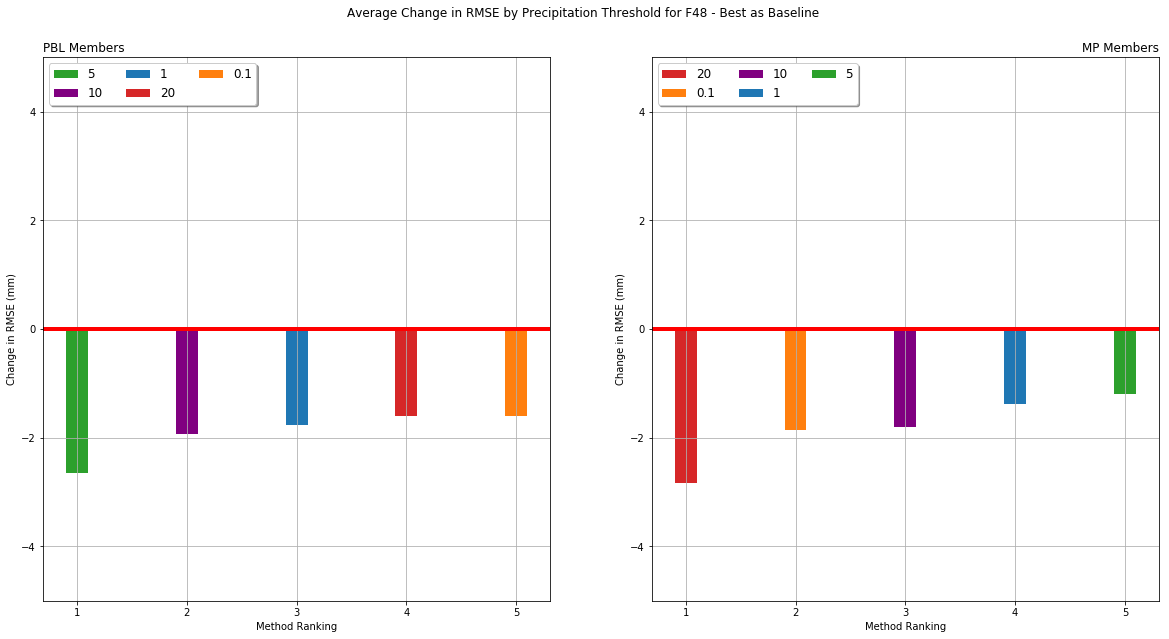

In [72]:
fig = plt.figure(figsize=(20, 10), facecolor='white')
ax = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
mean_rmse_change = []
i = 0
method = 'rmse_pcpT00'
for thresh in thresholds:
    data_an = np.load('/lustre/work/twixtrom/analogue_analysis_thresholds/f48/domain1/'+
                      method+'/'+thresh+'/'+method+'_rmse_an_pbl.npy')
    data_best = np.load('/lustre/work/twixtrom/analogue_analysis_thresholds/f48/domain1/'+
                        method+'/'+thresh+'/'+method+'_rmse_best_pbl.npy')
    mean_rmse_change.append(np.nanmean(data_best - data_an))

sort = np.argsort(np.array(mean_rmse_change))
rmse_change_sorted = np.array(mean_rmse_change)[sort]
thresholds_sorted = np.array(thresholds)[sort]
colors_sorted = np.array(thresh_colors)[sort]
for i in range(len(thresholds)):
    ax.bar(i+1, np.array(rmse_change_sorted[i]), 0.2, label=thresholds_sorted[i], color=colors_sorted[i])

ax.axhline(linewidth=4, color='red')
ax.set_ylim(-5, 5)
plt.xticks(range(1, 6))
ax.set_title('PBL Members', loc='left')
ax.set_ylabel('Change in RMSE (mm)')
ax.set_xlabel('Method Ranking')
ax.grid()
ax.legend(shadow=True, fontsize='large', loc=2, ncol=3)

mean_rmse_change = []
i = 0
method = 'rmse_pcpT00'
for thresh in thresholds:
    data_an = np.load('/lustre/work/twixtrom/analogue_analysis_thresholds/f48/domain1/'+
                      method+'/'+thresh+'/'+method+'_rmse_an_mp.npy')
    data_best = np.load('/lustre/work/twixtrom/analogue_analysis_thresholds/f48/domain1/'+
                        method+'/'+thresh+'/'+method+'_rmse_best_mp.npy')
    mean_rmse_change.append(np.nanmean(data_best - data_an))

sort = np.argsort(np.array(mean_rmse_change))
rmse_change_sorted = np.array(mean_rmse_change)[sort]
thresholds_sorted = np.array(thresholds)[sort]
colors_sorted = np.array(thresh_colors)[sort]
for i in range(len(thresholds)):
    ax2.bar(i+1, np.array(rmse_change_sorted[i]), 0.2, label=thresholds_sorted[i], color=colors_sorted[i])

ax2.set_title('MP Members', loc='right')
ax2.set_ylabel('Change in RMSE (mm)')
ax2.set_xlabel('Method Ranking')
ax2.axhline(linewidth=4, color='red')
ax2.set_ylim(-5, 5)
ax2.legend(shadow=True, fontsize='large', loc=2, ncol=3)
ax2.grid()
plt.suptitle('Average Change in RMSE by Precipitation Threshold for F48 - Best as Baseline', fontsize='large', y=0.95)
plt.show()

# CAPE Threshold Sensitivity, PCP Threshold of 10 mm

In [73]:
thresholds = ['10', '25', '50', '100', '500', '1000']
thresh_colors = ['tab:orange', 'tab:blue', 'tab:green', 'purple', 'tab:red', 'tan']

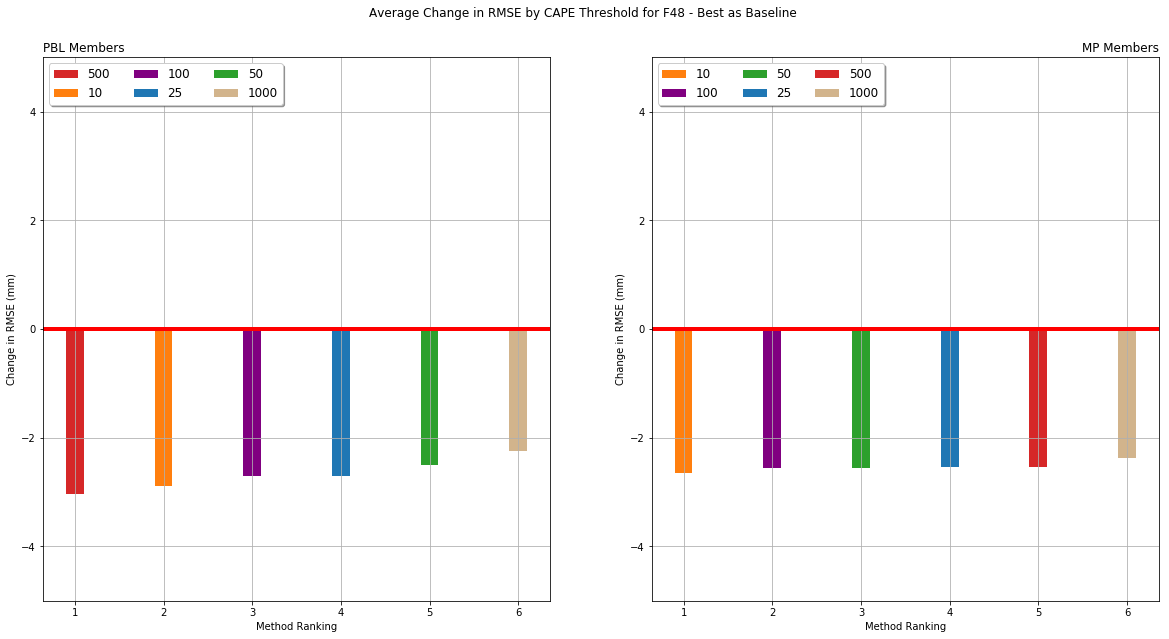

In [74]:
fig = plt.figure(figsize=(20, 10), facecolor='white')
ax = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
mean_rmse_change = []
i = 0
method = 'rmse_pcpT00+capeT-3'
for thresh in thresholds:
    data_an = np.load('/lustre/work/twixtrom/analogue_analysis_thresholds/f48/domain1/'+
                      method+'/'+thresh+'/'+method+'_rmse_an_pbl.npy')
    data_best = np.load('/lustre/work/twixtrom/analogue_analysis_thresholds/f48/domain1/'+
                        method+'/'+thresh+'/'+method+'_rmse_best_pbl.npy')
    mean_rmse_change.append(np.nanmean(data_best - data_an))

sort = np.argsort(np.array(mean_rmse_change))
rmse_change_sorted = np.array(mean_rmse_change)[sort]
thresholds_sorted = np.array(thresholds)[sort]
colors_sorted = np.array(thresh_colors)[sort]
for i in range(len(thresholds)):
    ax.bar(i+1, np.array(rmse_change_sorted[i]), 0.2, label=thresholds_sorted[i], color=colors_sorted[i])

ax.axhline(linewidth=4, color='red')
ax.set_ylim(-5, 5)
plt.xticks(range(1, 7))
ax.set_title('PBL Members', loc='left')
ax.set_ylabel('Change in RMSE (mm)')
ax.set_xlabel('Method Ranking')
ax.grid()
ax.legend(shadow=True, fontsize='large', loc=2, ncol=3)

mean_rmse_change = []
i = 0
for thresh in thresholds:
    data_an = np.load('/lustre/work/twixtrom/analogue_analysis_thresholds/f48/domain1/'+
                      method+'/'+thresh+'/'+method+'_rmse_an_mp.npy')
    data_best = np.load('/lustre/work/twixtrom/analogue_analysis_thresholds/f48/domain1/'+
                        method+'/'+thresh+'/'+method+'_rmse_best_mp.npy')
    mean_rmse_change.append(np.nanmean(data_best - data_an))

sort = np.argsort(np.array(mean_rmse_change))
rmse_change_sorted = np.array(mean_rmse_change)[sort]
thresholds_sorted = np.array(thresholds)[sort]
colors_sorted = np.array(thresh_colors)[sort]
for i in range(len(thresholds)):
    ax2.bar(i+1, np.array(rmse_change_sorted[i]), 0.2, label=thresholds_sorted[i], color=colors_sorted[i])

ax2.set_title('MP Members', loc='right')
ax2.set_ylabel('Change in RMSE (mm)')
ax2.set_xlabel('Method Ranking')
ax2.axhline(linewidth=4, color='red')
ax2.set_ylim(-5, 5)
ax2.legend(shadow=True, fontsize='large', loc=2, ncol=3)
ax2.grid()
plt.suptitle('Average Change in RMSE by CAPE Threshold for F48 - Best as Baseline', fontsize='large', y=0.95)
plt.show()

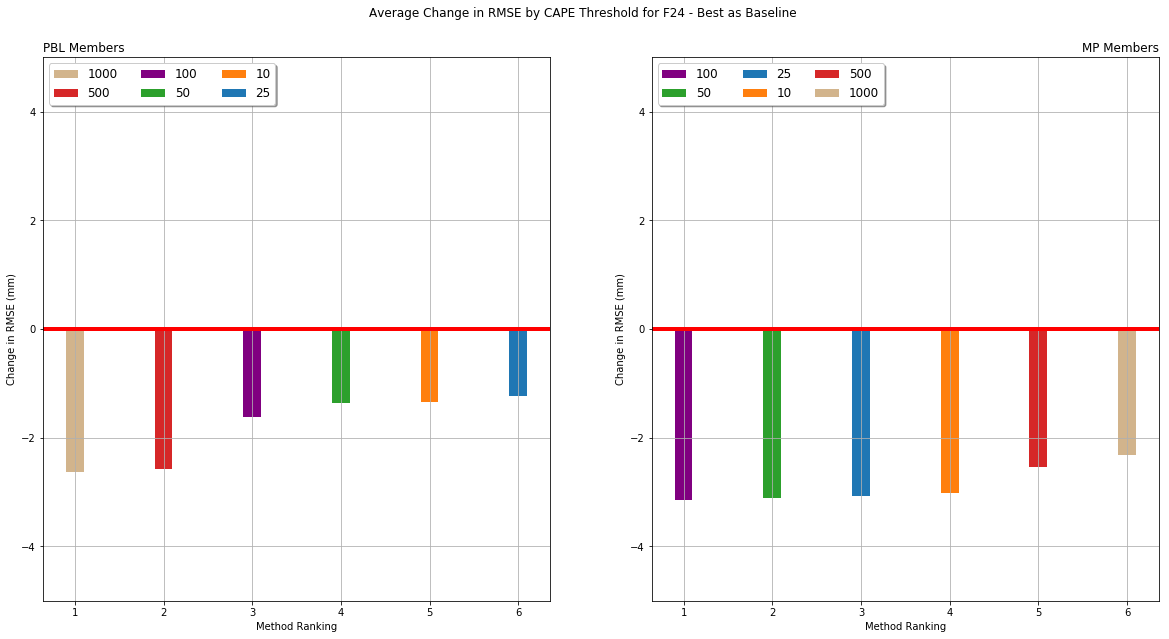

In [75]:
fig = plt.figure(figsize=(20, 10), facecolor='white')
ax = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
mean_rmse_change = []
i = 0
method = 'rmse_pcpT00+capeT-3'
for thresh in thresholds:
    data_an = np.load('/lustre/work/twixtrom/analogue_analysis_thresholds/f24/domain1/'+
                      method+'/'+thresh+'/'+method+'_rmse_an_pbl.npy')
    data_best = np.load('/lustre/work/twixtrom/analogue_analysis_thresholds/f24/domain1/'+
                        method+'/'+thresh+'/'+method+'_rmse_best_pbl.npy')
    mean_rmse_change.append(np.nanmean(data_best - data_an))

sort = np.argsort(np.array(mean_rmse_change))
rmse_change_sorted = np.array(mean_rmse_change)[sort]
thresholds_sorted = np.array(thresholds)[sort]
colors_sorted = np.array(thresh_colors)[sort]
for i in range(len(thresholds)):
    ax.bar(i+1, np.array(rmse_change_sorted[i]), 0.2, label=thresholds_sorted[i], color=colors_sorted[i])

ax.axhline(linewidth=4, color='red')
ax.set_ylim(-5, 5)
plt.xticks(range(1, 7))
ax.set_title('PBL Members', loc='left')
ax.set_ylabel('Change in RMSE (mm)')
ax.set_xlabel('Method Ranking')
ax.grid()
ax.legend(shadow=True, fontsize='large', loc=2, ncol=3)

mean_rmse_change = []
i = 0
for thresh in thresholds:
    data_an = np.load('/lustre/work/twixtrom/analogue_analysis_thresholds/f24/domain1/'+
                      method+'/'+thresh+'/'+method+'_rmse_an_mp.npy')
    data_best = np.load('/lustre/work/twixtrom/analogue_analysis_thresholds/f24/domain1/'+
                        method+'/'+thresh+'/'+method+'_rmse_best_mp.npy')
    mean_rmse_change.append(np.nanmean(data_best - data_an))

sort = np.argsort(np.array(mean_rmse_change))
rmse_change_sorted = np.array(mean_rmse_change)[sort]
thresholds_sorted = np.array(thresholds)[sort]
colors_sorted = np.array(thresh_colors)[sort]
for i in range(len(thresholds)):
    ax2.bar(i+1, np.array(rmse_change_sorted[i]), 0.2, label=thresholds_sorted[i], color=colors_sorted[i])

ax2.set_title('MP Members', loc='right')
ax2.set_ylabel('Change in RMSE (mm)')
ax2.set_xlabel('Method Ranking')
ax2.axhline(linewidth=4, color='red')
ax2.set_ylim(-5, 5)
ax2.legend(shadow=True, fontsize='large', loc=2, ncol=3)
ax2.grid()
plt.suptitle('Average Change in RMSE by CAPE Threshold for F24 - Best as Baseline', fontsize='large', y=0.95)
plt.show()

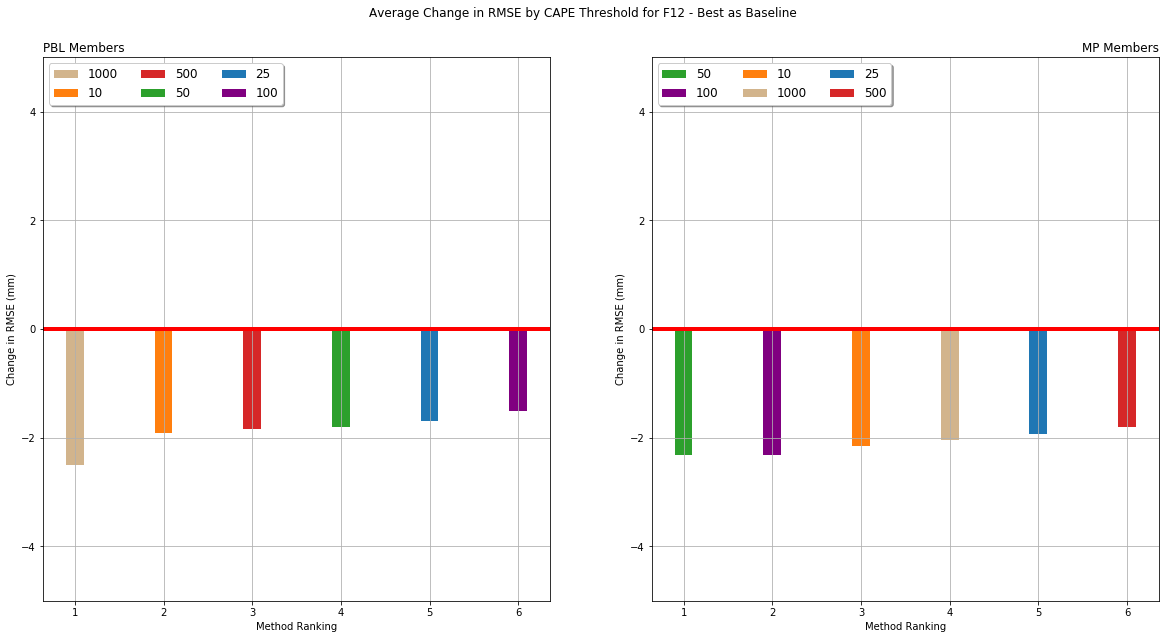

In [76]:
fig = plt.figure(figsize=(20, 10), facecolor='white')
ax = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
mean_rmse_change = []
i = 0
method = 'rmse_pcpT00+capeT-3'
for thresh in thresholds:
    data_an = np.load('/lustre/work/twixtrom/analogue_analysis_thresholds/f12/domain1/'+
                      method+'/'+thresh+'/'+method+'_rmse_an_pbl.npy')
    data_best = np.load('/lustre/work/twixtrom/analogue_analysis_thresholds/f12/domain1/'+
                        method+'/'+thresh+'/'+method+'_rmse_best_pbl.npy')
    mean_rmse_change.append(np.nanmean(data_best - data_an))

sort = np.argsort(np.array(mean_rmse_change))
rmse_change_sorted = np.array(mean_rmse_change)[sort]
thresholds_sorted = np.array(thresholds)[sort]
colors_sorted = np.array(thresh_colors)[sort]
for i in range(len(thresholds)):
    ax.bar(i+1, np.array(rmse_change_sorted[i]), 0.2, label=thresholds_sorted[i], color=colors_sorted[i])

ax.axhline(linewidth=4, color='red')
ax.set_ylim(-5, 5)
plt.xticks(range(1, 7))
ax.set_title('PBL Members', loc='left')
ax.set_ylabel('Change in RMSE (mm)')
ax.set_xlabel('Method Ranking')
ax.grid()
ax.legend(shadow=True, fontsize='large', loc=2, ncol=3)

mean_rmse_change = []
i = 0
for thresh in thresholds:
    data_an = np.load('/lustre/work/twixtrom/analogue_analysis_thresholds/f12/domain1/'+
                      method+'/'+thresh+'/'+method+'_rmse_an_mp.npy')
    data_best = np.load('/lustre/work/twixtrom/analogue_analysis_thresholds/f12/domain1/'+
                        method+'/'+thresh+'/'+method+'_rmse_best_mp.npy')
    mean_rmse_change.append(np.nanmean(data_best - data_an))

sort = np.argsort(np.array(mean_rmse_change))
rmse_change_sorted = np.array(mean_rmse_change)[sort]
thresholds_sorted = np.array(thresholds)[sort]
colors_sorted = np.array(thresh_colors)[sort]
for i in range(len(thresholds)):
    ax2.bar(i+1, np.array(rmse_change_sorted[i]), 0.2, label=thresholds_sorted[i], color=colors_sorted[i])

ax2.set_title('MP Members', loc='right')
ax2.set_ylabel('Change in RMSE (mm)')
ax2.set_xlabel('Method Ranking')
ax2.axhline(linewidth=4, color='red')
ax2.set_ylim(-5, 5)
ax2.legend(shadow=True, fontsize='large', loc=2, ncol=3)
ax2.grid()
plt.suptitle('Average Change in RMSE by CAPE Threshold for F12 - Best as Baseline', fontsize='large', y=0.95)
plt.show()

# Dewpt Threshold Sensitivity, PCP Threshold of 10 mm, CAPE threshold of 1000

In [77]:
thresholds = ['5', '10', '15', '20', '25', '30']
thresh_colors = ['tab:orange', 'tab:blue', 'tab:green', 'purple', 'tab:red', 'tan']

/home/twixtrom/miniconda3/envs/analogue/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: Mean of empty slice
  if sys.path[0] == '':
/home/twixtrom/miniconda3/envs/analogue/lib/python3.6/site-packages/ipykernel_launcher.py:37: RuntimeWarning: Mean of empty slice


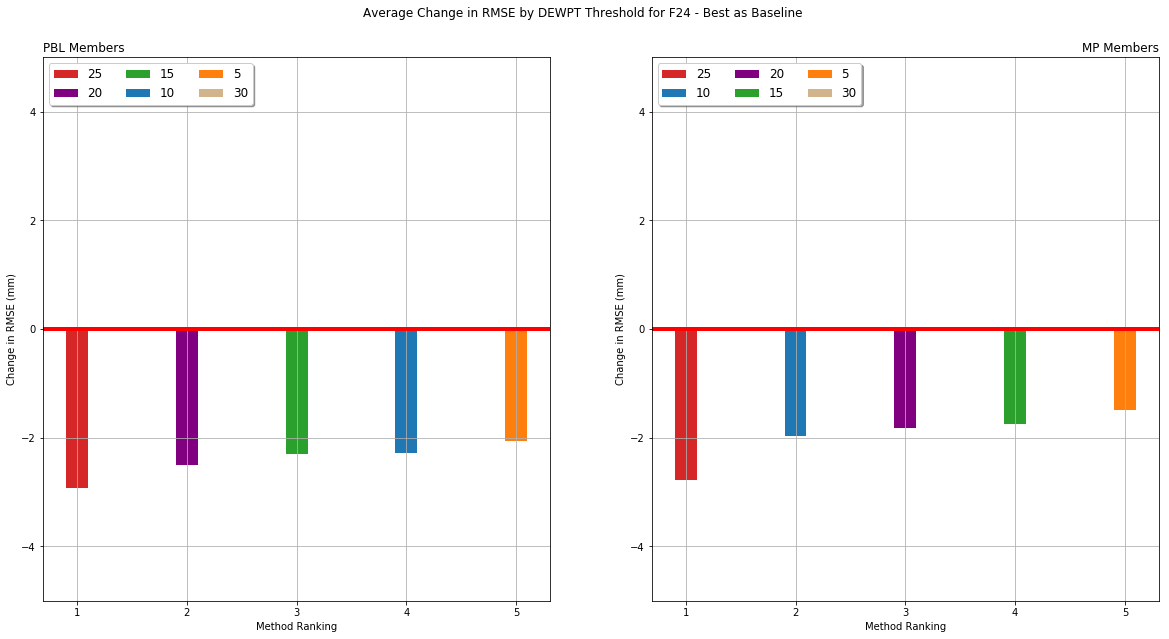

In [78]:
fig = plt.figure(figsize=(20, 10), facecolor='white')
ax = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
mean_rmse_change = []
i = 0
method = 'rmse_pcpT00+dewptT-3'
for thresh in thresholds:
    data_an = np.load('/lustre/work/twixtrom/analogue_analysis_thresholds/f24/domain1/'+
                      method+'/'+thresh+'/'+method+'_rmse_an_pbl.npy')
    data_best = np.load('/lustre/work/twixtrom/analogue_analysis_thresholds/f24/domain1/'+
                        method+'/'+thresh+'/'+method+'_rmse_best_pbl.npy')
    mean_rmse_change.append(np.nanmean(data_best - data_an))

sort = np.argsort(np.array(mean_rmse_change))
rmse_change_sorted = np.array(mean_rmse_change)[sort]
thresholds_sorted = np.array(thresholds)[sort]
colors_sorted = np.array(thresh_colors)[sort]
for i in range(len(thresholds)):
    ax.bar(i+1, np.array(rmse_change_sorted[i]), 0.2, label=thresholds_sorted[i], color=colors_sorted[i])

ax.axhline(linewidth=4, color='red')
ax.set_ylim(-5, 5)
plt.xticks(range(1, 8))
ax.set_title('PBL Members', loc='left')
ax.set_ylabel('Change in RMSE (mm)')
ax.set_xlabel('Method Ranking')
ax.grid()
ax.legend(shadow=True, fontsize='large', loc=2, ncol=3)

mean_rmse_change = []
i = 0
for thresh in thresholds:
    data_an = np.load('/lustre/work/twixtrom/analogue_analysis_thresholds/f24/domain1/'+
                      method+'/'+thresh+'/'+method+'_rmse_an_mp.npy')
    data_best = np.load('/lustre/work/twixtrom/analogue_analysis_thresholds/f24/domain1/'+
                        method+'/'+thresh+'/'+method+'_rmse_best_mp.npy')
    mean_rmse_change.append(np.nanmean(data_best - data_an))

sort = np.argsort(np.array(mean_rmse_change))
rmse_change_sorted = np.array(mean_rmse_change)[sort]
thresholds_sorted = np.array(thresholds)[sort]
colors_sorted = np.array(thresh_colors)[sort]
for i in range(len(thresholds)):
    ax2.bar(i+1, np.array(rmse_change_sorted[i]), 0.2, label=thresholds_sorted[i], color=colors_sorted[i])

ax2.set_title('MP Members', loc='right')
ax2.set_ylabel('Change in RMSE (mm)')
ax2.set_xlabel('Method Ranking')
ax2.axhline(linewidth=4, color='red')
ax2.set_ylim(-5, 5)
ax2.legend(shadow=True, fontsize='large', loc=2, ncol=3)
ax2.grid()
plt.suptitle('Average Change in RMSE by DEWPT Threshold for F24 - Best as Baseline', fontsize='large', y=0.95)
plt.show()

/home/twixtrom/miniconda3/envs/analogue/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: Mean of empty slice
  if sys.path[0] == '':
/home/twixtrom/miniconda3/envs/analogue/lib/python3.6/site-packages/ipykernel_launcher.py:37: RuntimeWarning: Mean of empty slice


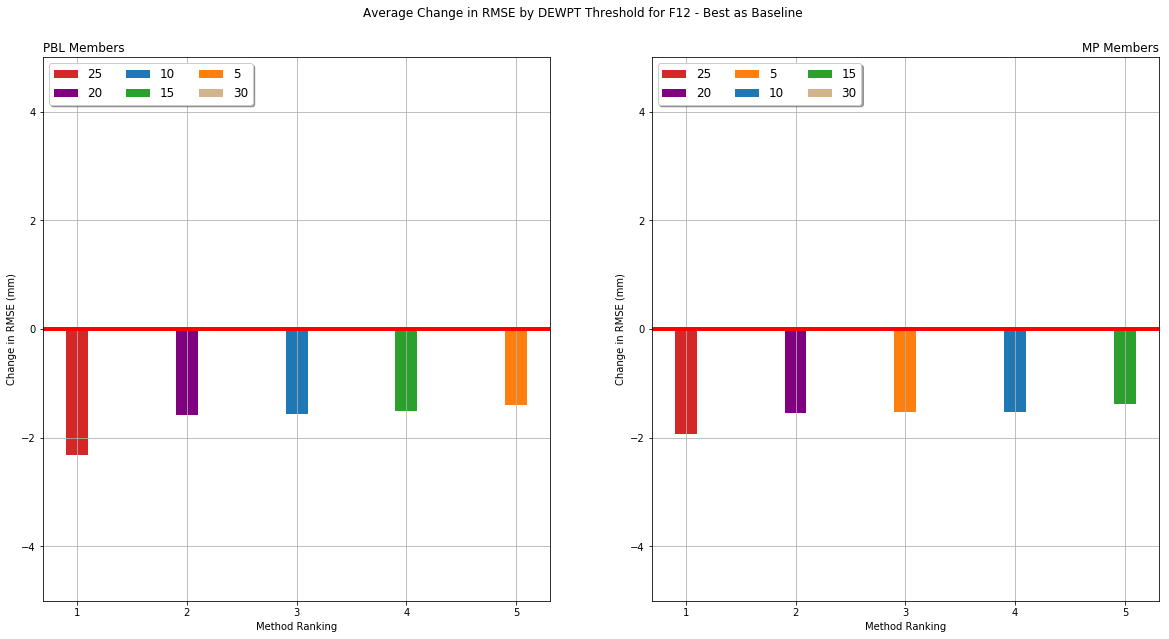

In [79]:
fig = plt.figure(figsize=(20, 10), facecolor='white')
ax = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
mean_rmse_change = []
i = 0
method = 'rmse_pcpT00+dewptT-3'
for thresh in thresholds:
    data_an = np.load('/lustre/work/twixtrom/analogue_analysis_thresholds/f12/domain1/'+
                      method+'/'+thresh+'/'+method+'_rmse_an_pbl.npy')
    data_best = np.load('/lustre/work/twixtrom/analogue_analysis_thresholds/f12/domain1/'+
                        method+'/'+thresh+'/'+method+'_rmse_best_pbl.npy')
    mean_rmse_change.append(np.nanmean(data_best - data_an))

sort = np.argsort(np.array(mean_rmse_change))
rmse_change_sorted = np.array(mean_rmse_change)[sort]
thresholds_sorted = np.array(thresholds)[sort]
colors_sorted = np.array(thresh_colors)[sort]
for i in range(len(thresholds)):
    ax.bar(i+1, np.array(rmse_change_sorted[i]), 0.2, label=thresholds_sorted[i], color=colors_sorted[i])

ax.axhline(linewidth=4, color='red')
ax.set_ylim(-5, 5)
plt.xticks(range(1, 7))
ax.set_title('PBL Members', loc='left')
ax.set_ylabel('Change in RMSE (mm)')
ax.set_xlabel('Method Ranking')
ax.grid()
ax.legend(shadow=True, fontsize='large', loc=2, ncol=3)

mean_rmse_change = []
i = 0
for thresh in thresholds:
    data_an = np.load('/lustre/work/twixtrom/analogue_analysis_thresholds/f12/domain1/'+
                      method+'/'+thresh+'/'+method+'_rmse_an_mp.npy')
    data_best = np.load('/lustre/work/twixtrom/analogue_analysis_thresholds/f12/domain1/'+
                        method+'/'+thresh+'/'+method+'_rmse_best_mp.npy')
    mean_rmse_change.append(np.nanmean(data_best - data_an))

sort = np.argsort(np.array(mean_rmse_change))
rmse_change_sorted = np.array(mean_rmse_change)[sort]
thresholds_sorted = np.array(thresholds)[sort]
colors_sorted = np.array(thresh_colors)[sort]
for i in range(len(thresholds)):
    ax2.bar(i+1, np.array(rmse_change_sorted[i]), 0.2, label=thresholds_sorted[i], color=colors_sorted[i])

ax2.set_title('MP Members', loc='right')
ax2.set_ylabel('Change in RMSE (mm)')
ax2.set_xlabel('Method Ranking')
ax2.axhline(linewidth=4, color='red')
ax2.set_ylim(-5, 5)
ax2.legend(shadow=True, fontsize='large', loc=2, ncol=3)
ax2.grid()
plt.suptitle('Average Change in RMSE by DEWPT Threshold for F12 - Best as Baseline', fontsize='large', y=0.95)
plt.show()

# Height Threshold Sensitivity, PCP Threshold of 10 mm, CAPE threshold of 1000

In [80]:
thresholds = ['5200', '5400', '5700', '5900', '6000']
thresh_colors = ['tab:orange', 'tab:blue', 'tab:green', 'purple', 'tab:red', 'tan']

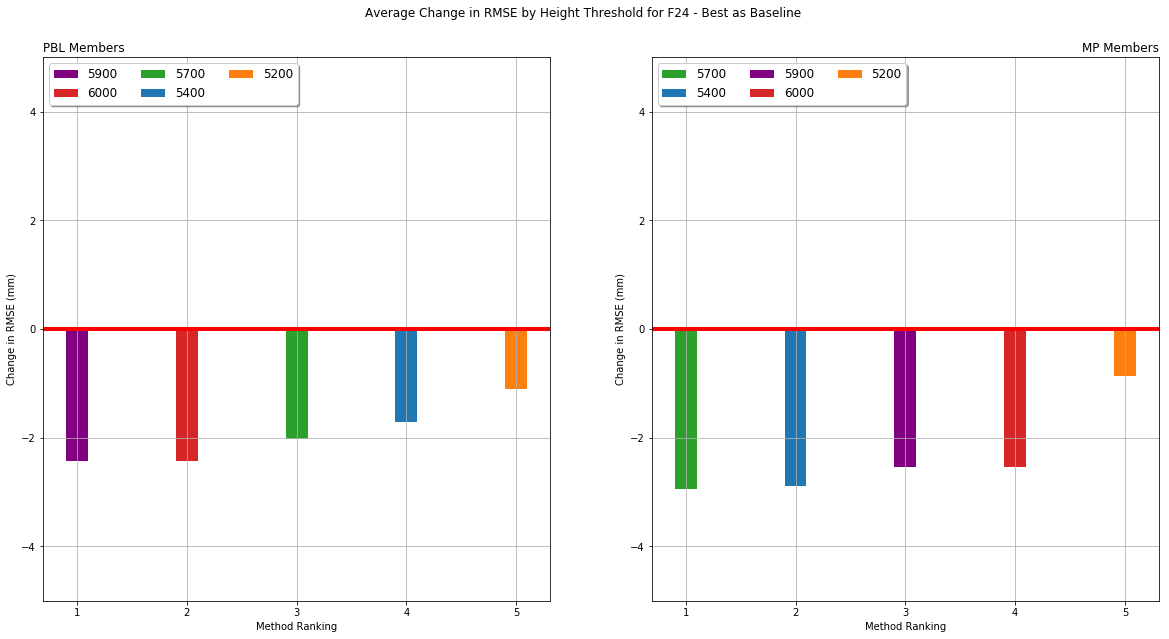

In [81]:
fig = plt.figure(figsize=(20, 10), facecolor='white')
ax = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
mean_rmse_change = []
i = 0
method = 'rmse_pcpT00+hgt500f00+capeT-3'
for thresh in thresholds:
    data_an = np.load('/lustre/work/twixtrom/analogue_analysis_thresholds/f24/domain1/'+
                      method+'/'+thresh+'/'+method+'_rmse_an_pbl.npy')
    data_best = np.load('/lustre/work/twixtrom/analogue_analysis_thresholds/f24/domain1/'+
                        method+'/'+thresh+'/'+method+'_rmse_best_pbl.npy')
    mean_rmse_change.append(np.nanmean(data_best - data_an))

sort = np.argsort(np.array(mean_rmse_change))
rmse_change_sorted = np.array(mean_rmse_change)[sort]
thresholds_sorted = np.array(thresholds)[sort]
colors_sorted = np.array(thresh_colors)[sort]
for i in range(len(thresholds)):
    ax.bar(i+1, np.array(rmse_change_sorted[i]), 0.2, label=thresholds_sorted[i], color=colors_sorted[i])

ax.axhline(linewidth=4, color='red')
ax.set_ylim(-5, 5)
plt.xticks(range(1, 8))
ax.set_title('PBL Members', loc='left')
ax.set_ylabel('Change in RMSE (mm)')
ax.set_xlabel('Method Ranking')
ax.grid()
ax.legend(shadow=True, fontsize='large', loc=2, ncol=3)

mean_rmse_change = []
i = 0
for thresh in thresholds:
    data_an = np.load('/lustre/work/twixtrom/analogue_analysis_thresholds/f24/domain1/'+
                      method+'/'+thresh+'/'+method+'_rmse_an_mp.npy')
    data_best = np.load('/lustre/work/twixtrom/analogue_analysis_thresholds/f24/domain1/'+
                        method+'/'+thresh+'/'+method+'_rmse_best_mp.npy')
    mean_rmse_change.append(np.nanmean(data_best - data_an))

sort = np.argsort(np.array(mean_rmse_change))
rmse_change_sorted = np.array(mean_rmse_change)[sort]
thresholds_sorted = np.array(thresholds)[sort]
colors_sorted = np.array(thresh_colors)[sort]
for i in range(len(thresholds)):
    ax2.bar(i+1, np.array(rmse_change_sorted[i]), 0.2, label=thresholds_sorted[i], color=colors_sorted[i])

ax2.set_title('MP Members', loc='right')
ax2.set_ylabel('Change in RMSE (mm)')
ax2.set_xlabel('Method Ranking')
ax2.axhline(linewidth=4, color='red')
ax2.set_ylim(-5, 5)
ax2.legend(shadow=True, fontsize='large', loc=2, ncol=3)
ax2.grid()
plt.suptitle('Average Change in RMSE by Height Threshold for F24 - Best as Baseline', fontsize='large', y=0.95)
plt.show()

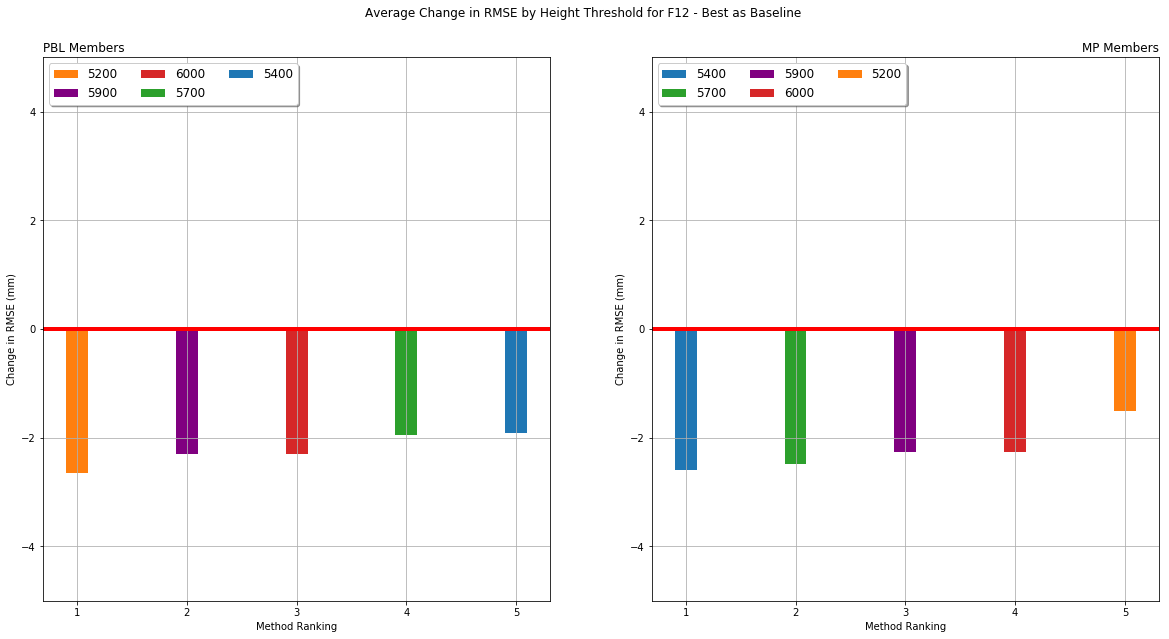

In [82]:
fig = plt.figure(figsize=(20, 10), facecolor='white')
ax = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
mean_rmse_change = []
i = 0
method = 'rmse_pcpT00+hgt500f00+capeT-3'
for thresh in thresholds:
    data_an = np.load('/lustre/work/twixtrom/analogue_analysis_thresholds/f12/domain1/'+
                      method+'/'+thresh+'/'+method+'_rmse_an_pbl.npy')
    data_best = np.load('/lustre/work/twixtrom/analogue_analysis_thresholds/f12/domain1/'+
                        method+'/'+thresh+'/'+method+'_rmse_best_pbl.npy')
    mean_rmse_change.append(np.nanmean(data_best - data_an))

sort = np.argsort(np.array(mean_rmse_change))
rmse_change_sorted = np.array(mean_rmse_change)[sort]
thresholds_sorted = np.array(thresholds)[sort]
colors_sorted = np.array(thresh_colors)[sort]
for i in range(len(thresholds)):
    ax.bar(i+1, np.array(rmse_change_sorted[i]), 0.2, label=thresholds_sorted[i], color=colors_sorted[i])

ax.axhline(linewidth=4, color='red')
ax.set_ylim(-5, 5)
plt.xticks(range(1, 7))
ax.set_title('PBL Members', loc='left')
ax.set_ylabel('Change in RMSE (mm)')
ax.set_xlabel('Method Ranking')
ax.grid()
ax.legend(shadow=True, fontsize='large', loc=2, ncol=3)

mean_rmse_change = []
i = 0
for thresh in thresholds:
    data_an = np.load('/lustre/work/twixtrom/analogue_analysis_thresholds/f12/domain1/'+
                      method+'/'+thresh+'/'+method+'_rmse_an_mp.npy')
    data_best = np.load('/lustre/work/twixtrom/analogue_analysis_thresholds/f12/domain1/'+
                        method+'/'+thresh+'/'+method+'_rmse_best_mp.npy')
    mean_rmse_change.append(np.nanmean(data_best - data_an))

sort = np.argsort(np.array(mean_rmse_change))
rmse_change_sorted = np.array(mean_rmse_change)[sort]
thresholds_sorted = np.array(thresholds)[sort]
colors_sorted = np.array(thresh_colors)[sort]
for i in range(len(thresholds)):
    ax2.bar(i+1, np.array(rmse_change_sorted[i]), 0.2, label=thresholds_sorted[i], color=colors_sorted[i])

ax2.set_title('MP Members', loc='right')
ax2.set_ylabel('Change in RMSE (mm)')
ax2.set_xlabel('Method Ranking')
ax2.axhline(linewidth=4, color='red')
ax2.set_ylim(-5, 5)
ax2.legend(shadow=True, fontsize='large', loc=2, ncol=3)
ax2.grid()
plt.suptitle('Average Change in RMSE by Height Threshold for F12 - Best as Baseline', fontsize='large', y=0.95)
plt.show()

# MSLP Threshold Sensitivity, PCP Threshold of 10 mm, DEWPT threshold of 20

In [83]:
thresholds = ['995', '1000', '1005', '1010', '1015', '1020', '1025']
thresh_colors = ['tab:orange', 'tab:blue', 'tab:green', 'purple', 'tab:red', 'tan', 'yellow']

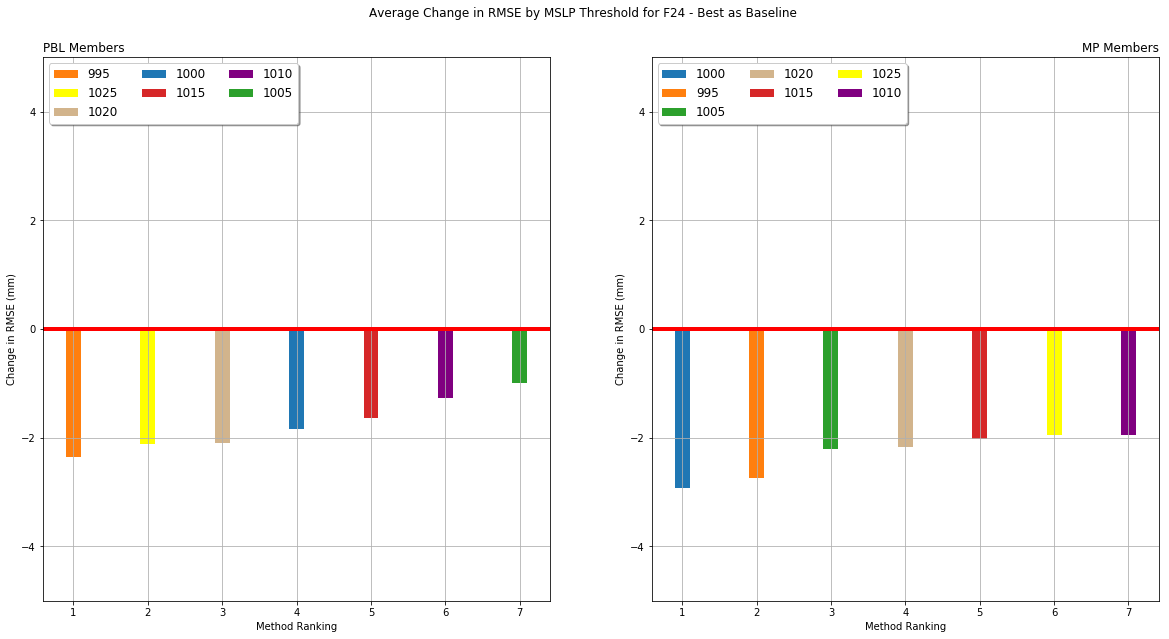

In [84]:
fig = plt.figure(figsize=(20, 10), facecolor='white')
ax = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
mean_rmse_change = []
i = 0
method = 'rmse_pcpT00+dewptT00+mslpT00'
for thresh in thresholds:
    data_an = np.load('/lustre/work/twixtrom/analogue_analysis_thresholds/f24/domain1/'+
                      method+'/'+thresh+'/'+method+'_rmse_an_pbl.npy')
    data_best = np.load('/lustre/work/twixtrom/analogue_analysis_thresholds/f24/domain1/'+
                        method+'/'+thresh+'/'+method+'_rmse_best_pbl.npy')
    mean_rmse_change.append(np.nanmean(data_best - data_an))

sort = np.argsort(np.array(mean_rmse_change))
rmse_change_sorted = np.array(mean_rmse_change)[sort]
thresholds_sorted = np.array(thresholds)[sort]
colors_sorted = np.array(thresh_colors)[sort]
for i in range(len(thresholds)):
    ax.bar(i+1, rmse_change_sorted[i], 0.2, label=thresholds_sorted[i], color=colors_sorted[i])

ax.axhline(linewidth=4, color='red')
ax.set_ylim(-5, 5)
plt.xticks(range(1, 8))
ax.set_title('PBL Members', loc='left')
ax.set_ylabel('Change in RMSE (mm)')
ax.set_xlabel('Method Ranking')
ax.grid()
ax.legend(shadow=True, fontsize='large', loc=2, ncol=3)

mean_rmse_change = []
i = 0
for thresh in thresholds:
    data_an = np.load('/lustre/work/twixtrom/analogue_analysis_thresholds/f24/domain1/'+
                      method+'/'+thresh+'/'+method+'_rmse_an_mp.npy')
    data_best = np.load('/lustre/work/twixtrom/analogue_analysis_thresholds/f24/domain1/'+
                        method+'/'+thresh+'/'+method+'_rmse_best_mp.npy')
    mean_rmse_change.append(np.nanmean(data_best - data_an))

sort = np.argsort(np.array(mean_rmse_change))
rmse_change_sorted = np.array(mean_rmse_change)[sort]
thresholds_sorted = np.array(thresholds)[sort]
colors_sorted = np.array(thresh_colors)[sort]
for i in range(len(thresholds)):
    ax2.bar(i+1, np.array(rmse_change_sorted[i]), 0.2, label=thresholds_sorted[i], color=colors_sorted[i])

ax2.set_title('MP Members', loc='right')
ax2.set_ylabel('Change in RMSE (mm)')
ax2.set_xlabel('Method Ranking')
ax2.axhline(linewidth=4, color='red')
ax2.set_ylim(-5, 5)
ax2.legend(shadow=True, fontsize='large', loc=2, ncol=3)
ax2.grid()
plt.suptitle('Average Change in RMSE by MSLP Threshold for F24 - Best as Baseline', fontsize='large', y=0.95)
plt.show()

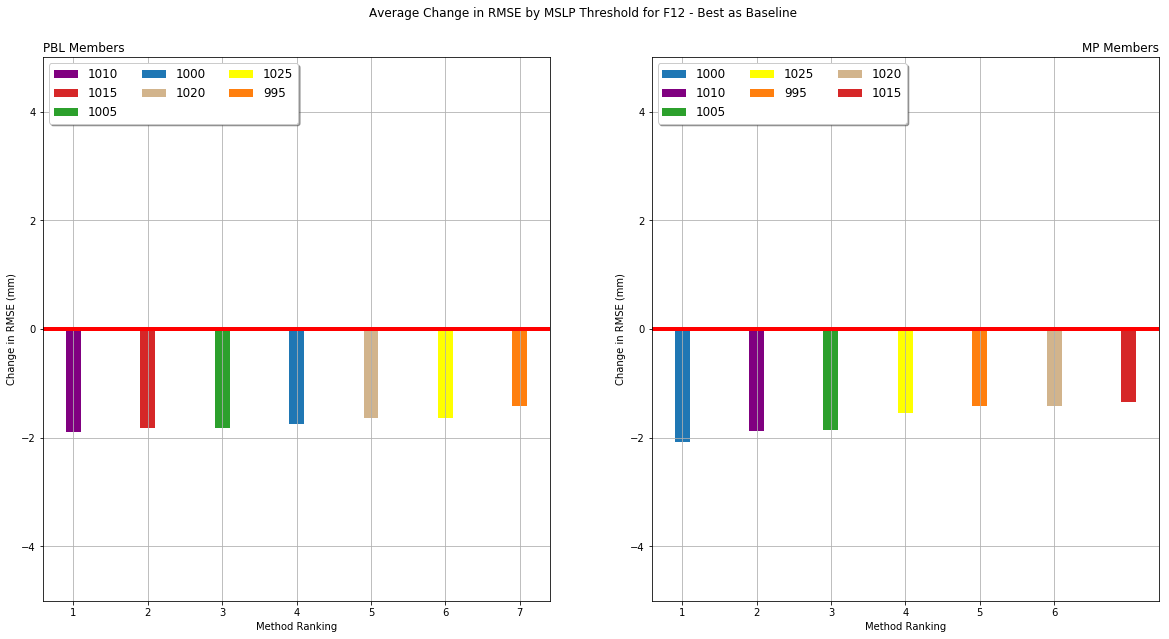

In [85]:
fig = plt.figure(figsize=(20, 10), facecolor='white')
ax = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
mean_rmse_change = []
i = 0
method = 'rmse_pcpT00+dewptT00+mslpT00'
for thresh in thresholds:
    data_an = np.load('/lustre/work/twixtrom/analogue_analysis_thresholds/f12/domain1/'+
                      method+'/'+thresh+'/'+method+'_rmse_an_pbl.npy')
    data_best = np.load('/lustre/work/twixtrom/analogue_analysis_thresholds/f12/domain1/'+
                        method+'/'+thresh+'/'+method+'_rmse_best_pbl.npy')
    mean_rmse_change.append(np.nanmean(data_best - data_an))

sort = np.argsort(np.array(mean_rmse_change))
rmse_change_sorted = np.array(mean_rmse_change)[sort]
thresholds_sorted = np.array(thresholds)[sort]
colors_sorted = np.array(thresh_colors)[sort]
for i in range(len(thresholds)):
    ax.bar(i+1, np.array(rmse_change_sorted[i]), 0.2, label=thresholds_sorted[i], color=colors_sorted[i])

ax.axhline(linewidth=4, color='red')
ax.set_ylim(-5, 5)
plt.xticks(range(1, 7))
ax.set_title('PBL Members', loc='left')
ax.set_ylabel('Change in RMSE (mm)')
ax.set_xlabel('Method Ranking')
ax.grid()
ax.legend(shadow=True, fontsize='large', loc=2, ncol=3)

mean_rmse_change = []
i = 0
for thresh in thresholds:
    data_an = np.load('/lustre/work/twixtrom/analogue_analysis_thresholds/f12/domain1/'+
                      method+'/'+thresh+'/'+method+'_rmse_an_mp.npy')
    data_best = np.load('/lustre/work/twixtrom/analogue_analysis_thresholds/f12/domain1/'+
                        method+'/'+thresh+'/'+method+'_rmse_best_mp.npy')
    mean_rmse_change.append(np.nanmean(data_best - data_an))

sort = np.argsort(np.array(mean_rmse_change))
rmse_change_sorted = np.array(mean_rmse_change)[sort]
thresholds_sorted = np.array(thresholds)[sort]
colors_sorted = np.array(thresh_colors)[sort]
for i in range(len(thresholds)):
    ax2.bar(i+1, np.array(rmse_change_sorted[i]), 0.2, label=thresholds_sorted[i], color=colors_sorted[i])

ax2.set_title('MP Members', loc='right')
ax2.set_ylabel('Change in RMSE (mm)')
ax2.set_xlabel('Method Ranking')
ax2.axhline(linewidth=4, color='red')
ax2.set_ylim(-5, 5)
ax2.legend(shadow=True, fontsize='large', loc=2, ncol=3)
ax2.grid()
plt.suptitle('Average Change in RMSE by MSLP Threshold for F12 - Best as Baseline', fontsize='large', y=0.95)
plt.show()

# Final Method Testing - Optimal Thresholds

In [3]:
methods = [
    "rmse_pcpT00",
    "rmse_pcpT00+dewptT00",
    "rmse_pcpT00+dewptT00+mslpT00",
    "rmse_pcpT00+dewptf00",
    "rmse_pcpT00+dewptf00+mslpf00",
    "rmse_pcpT00+capeT-3",
    "rmse_pcpT00+dewptT-3",
    "pcp_area_rmse_pcpT00+dewptT-3",
    "pcp_area_rmse_pcpT00+dewptT-3+mslpT-3",
    "pcp_area_rmse_pcpT00+dewptf00+mslpf00",
    "pcp_area_rmse_pcpT00+height_500hPaT00",
    "pcp_area_rmse_pcpT00+hgt500f00+capeT-3",
    "rmse_pcpT00+hgt500f00+capeT-3",
          ]

method_labels = [
    "pcpT00",
    "Different Points - pcpT00+dewptT00",
    "Different Points - pcpT00+dewptT00+mslpT00",
    "Different Points - pcpT00+dewptf00",
    "Different Points - pcpT00+dewptf00+mslpf00",
    "Different Points - pcpT00+capeT-3",
    "Different Points - pcpT00+dewptT-3",
    "Same Points - pcpT00+dewptT-3",
    "Same Points - pcpT00+dewptT-3+mslpT-3",
    "Same Points - pcpT00+dewptf00+mslpf00",
    "Same Points - pcpT00+hgt500hPaT00",
    "Same Points - pcpT00+hgt500f00+capeT-3",
    "Different Points - pcpT00+hgt500f00+capeT-3",
          ]

In [4]:
mem_colors = ['tab:orange', 'tab:blue', 'tab:green', 'cyan', 'yellow', 'tan', 'violet', 'olive', 'skyblue', 'coral', 'pink', 'chocolate', 'tab:red']
color_dict = {}
for label, color in zip(method_labels, mem_colors):
    color_dict[label] = color

In [5]:
import scipy.stats
import pandas as pd
import matplotlib.patches as mpatches

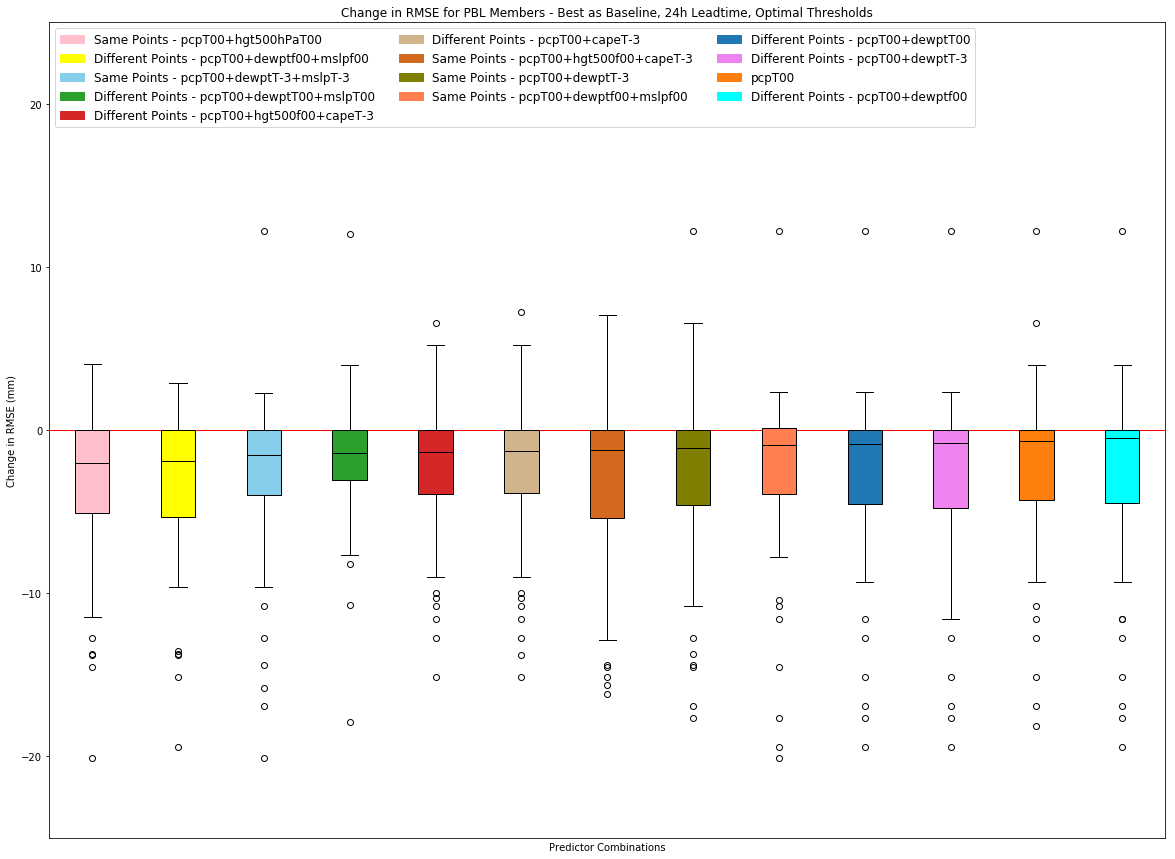

In [6]:
fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(1, 1, 1)
mean_rmse_change = []
i = 0
for method in methods:
    data_an = np.load('/lustre/work/twixtrom/analogue_analysis_optimal/f24/'+method+'/'+method+'_rmse_an_pbl.npy')
    data_best = np.load('/lustre/work/twixtrom/analogue_analysis_optimal/f24/'+method+'/'+method+'_rmse_best_pbl.npy')
    mean_rmse_change.append(data_best - data_an)
data = {}
for key, array in zip(method_labels, mean_rmse_change):
    data[key] = array
dataframe = pd.DataFrame(data=data)
meds = dataframe.median().sort_values()
bp = dataframe[meds.index].plot.box(ax=ax, rot=90, widths=0.4, patch_artist=True, return_type='dict', color={'medians': 'k', 'boxes': 'k', 'whiskers': 'k'})

legend_patches = []
for patch, label in zip(bp['boxes'], meds.keys()):
    patch.set_facecolor(color_dict[label])
    legend_patches.append(mpatches.Patch(color=color_dict[label], label=label))
plt.ylim(-25, 25)
ax.axhline(linewidth=1, color='red')
plt.title('Change in RMSE for PBL Members - Best as Baseline, 24h Leadtime, Optimal Thresholds')
plt.ylabel('Change in RMSE (mm)')
plt.xticks([])
plt.xlabel('Predictor Combinations')
# plt.grid()
plt.legend(handles=legend_patches, fontsize='large', loc=2, ncol=3)
plt.show()

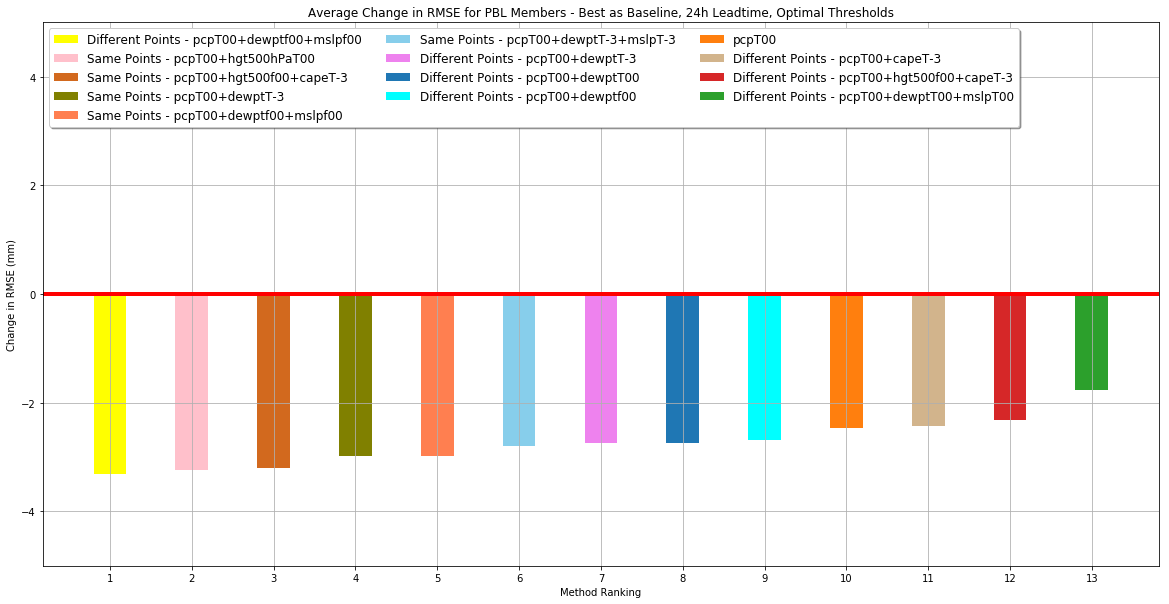

In [93]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 1, 1)
mean_rmse_change = []
i = 0
for method in methods:
    data_an = np.load('/lustre/work/twixtrom/analogue_analysis_optimal/f24/'+method+'/'+method+'_rmse_an_pbl.npy')
    data_best = np.load('/lustre/work/twixtrom/analogue_analysis_optimal/f24/'+method+'/'+method+'_rmse_best_pbl.npy')
    mean_rmse_change.append(np.nanmean(data_best - data_an))
sort = np.argsort(np.array(mean_rmse_change))
rmse_change_sorted = np.array(mean_rmse_change)[sort]
methods_sorted = np.array(methods)[sort]
labels_sorted = np.array(method_labels)[sort]
colors_sorted = np.array(mem_colors)[sort]
for i in range(len(methods)):
    plt.bar(i+1, np.array(rmse_change_sorted[i]), 0.4, label=labels_sorted[i], color=colors_sorted[i])

plt.ylim(-5, 5)
plt.xticks(range(1, 14))
plt.title('Average Change in RMSE for PBL Members - Best as Baseline, 24h Leadtime, Optimal Thresholds')
plt.ylabel('Change in RMSE (mm)')
plt.xlabel('Method Ranking')
ax.axhline(linewidth=4, color='red')
plt.legend(shadow=True, fontsize='large', loc=2, ncol=3)
plt.grid()
plt.show()

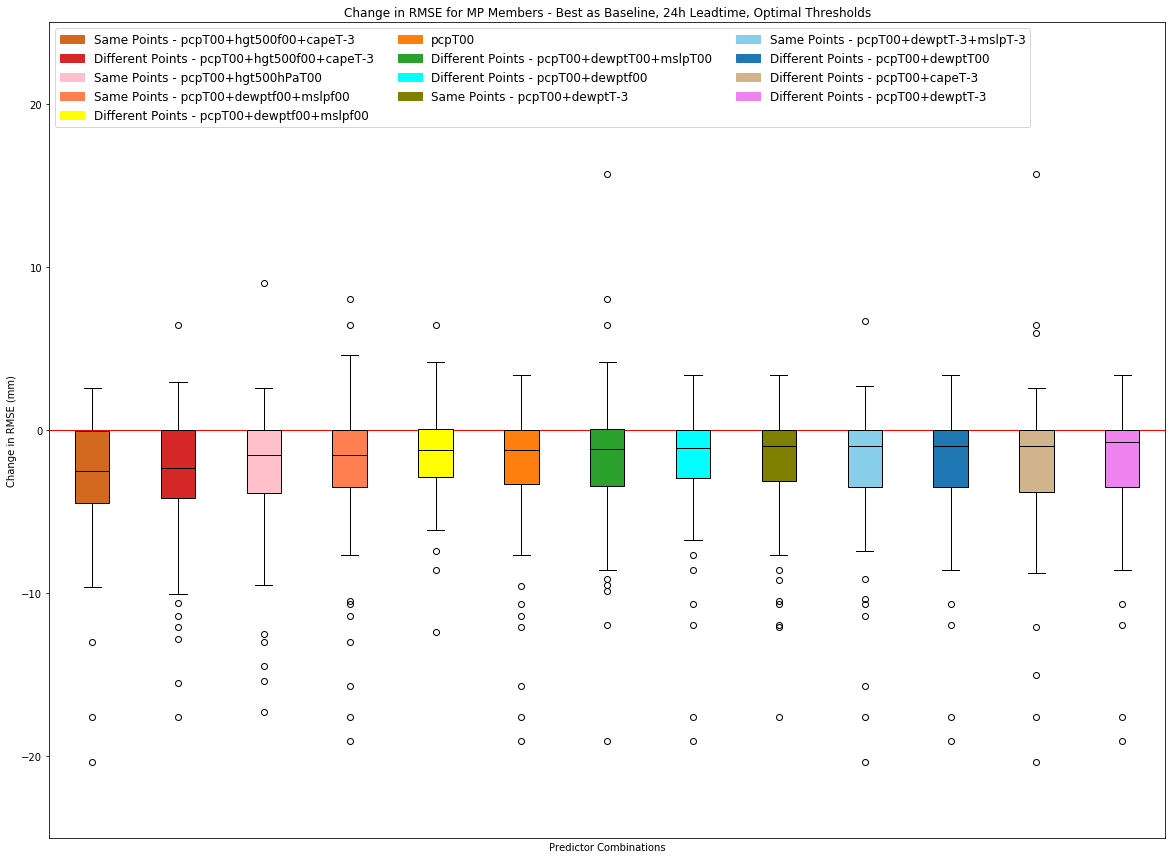

In [7]:
fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(1, 1, 1)
mean_rmse_change = []
i = 0
for method in methods:
    data_an = np.load('/lustre/work/twixtrom/analogue_analysis_optimal/f24/'+method+'/'+method+'_rmse_an_mp.npy')
    data_best = np.load('/lustre/work/twixtrom/analogue_analysis_optimal/f24/'+method+'/'+method+'_rmse_best_mp.npy')
    mean_rmse_change.append(data_best - data_an)
data = {}
for key, array in zip(method_labels, mean_rmse_change):
    data[key] = array
dataframe = pd.DataFrame(data=data)
meds = dataframe.median().sort_values()
bp = dataframe[meds.index].plot.box(ax=ax, rot=90, widths=0.4, patch_artist=True, return_type='dict', color={'medians': 'k', 'boxes': 'k', 'whiskers': 'k'})

legend_patches = []
for patch, label in zip(bp['boxes'], meds.keys()):
    patch.set_facecolor(color_dict[label])
    legend_patches.append(mpatches.Patch(color=color_dict[label], label=label))
plt.ylim(-25, 25)
ax.axhline(linewidth=1, color='red')
plt.title('Change in RMSE for MP Members - Best as Baseline, 24h Leadtime, Optimal Thresholds')
plt.ylabel('Change in RMSE (mm)')
plt.xticks([])
plt.xlabel('Predictor Combinations')
# plt.grid()
plt.legend(handles=legend_patches, fontsize='large', loc=2, ncol=3)
plt.show()

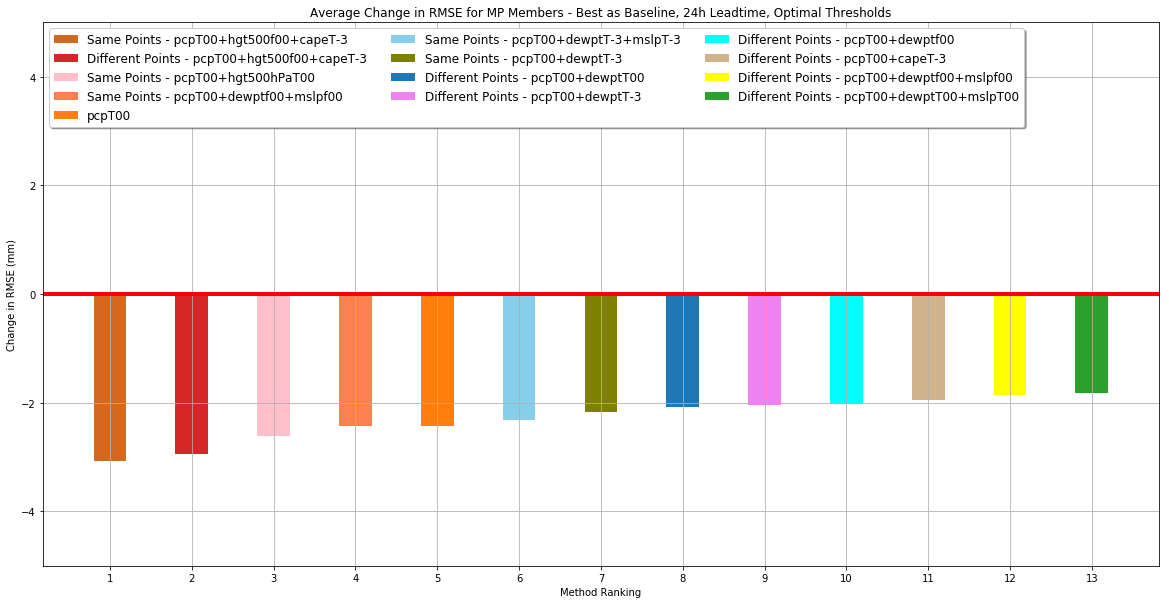

In [95]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 1, 1)
mean_rmse_change = []
i = 0
for method in methods:
    data_an = np.load('/lustre/work/twixtrom/analogue_analysis_optimal/f24/'+method+'/'+method+'_rmse_an_mp.npy')
    data_best = np.load('/lustre/work/twixtrom/analogue_analysis_optimal/f24/'+method+'/'+method+'_rmse_best_mp.npy')
    mean_rmse_change.append(np.nanmean(data_best - data_an))

sort = np.argsort(np.array(mean_rmse_change))
rmse_change_sorted = np.array(mean_rmse_change)[sort]
methods_sorted = np.array(methods)[sort]
labels_sorted = np.array(method_labels)[sort]
colors_sorted = np.array(mem_colors)[sort]
for i in range(len(methods)):
    plt.bar(i+1, np.array(rmse_change_sorted[i]), 0.4, label=labels_sorted[i], color=colors_sorted[i])

plt.ylim(-5, 5)
plt.xticks(range(1, 14))
plt.ylabel('Change in RMSE (mm)')
plt.xlabel('Method Ranking')
plt.title('Average Change in RMSE for MP Members - Best as Baseline, 24h Leadtime, Optimal Thresholds')
ax.axhline(linewidth=4, color='red')
plt.legend(shadow=True, fontsize='large', loc=2, ncol=3)
plt.grid()
plt.show()

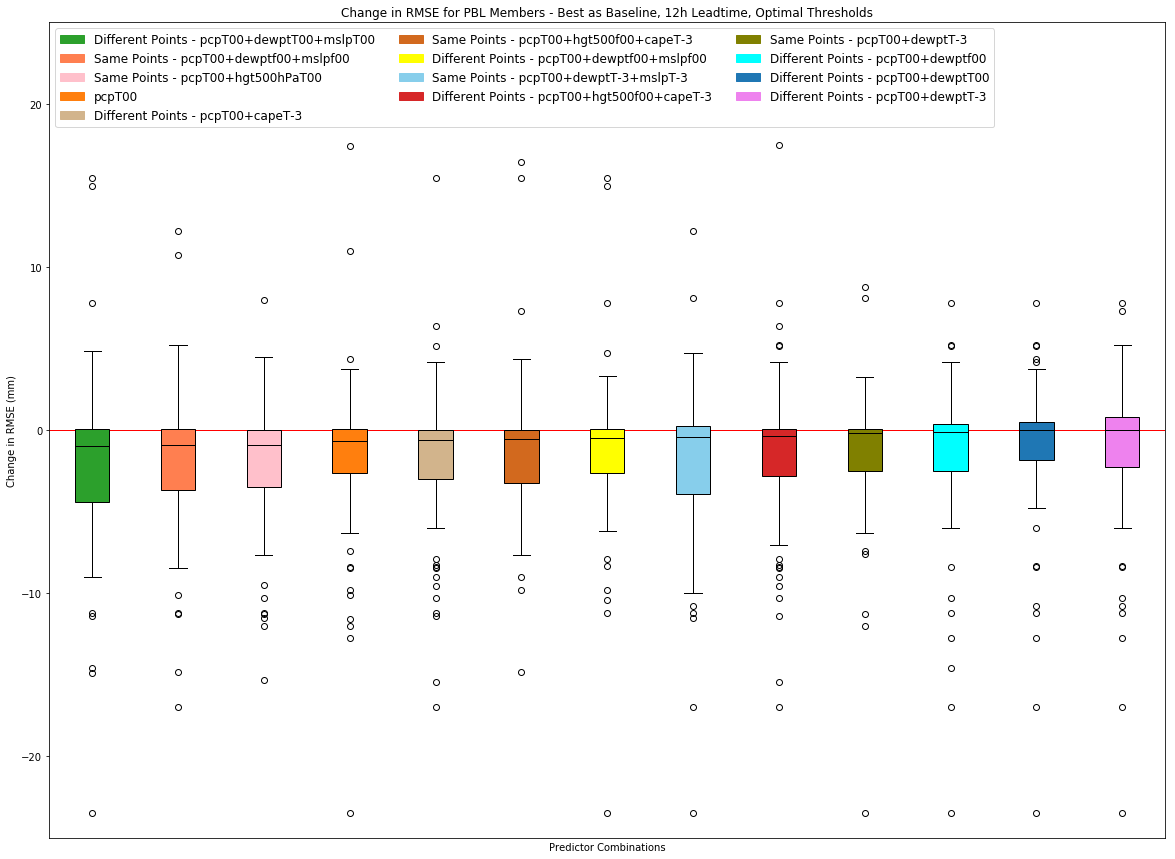

In [8]:
fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(1, 1, 1)
mean_rmse_change = []
i = 0
for method in methods:
    data_an = np.load('/lustre/work/twixtrom/analogue_analysis_optimal/f12/'+method+'/'+method+'_rmse_an_pbl.npy')
    data_best = np.load('/lustre/work/twixtrom/analogue_analysis_optimal/f12/'+method+'/'+method+'_rmse_best_pbl.npy')
    mean_rmse_change.append(data_best - data_an)
data = {}
for key, array in zip(method_labels, mean_rmse_change):
    data[key] = array
dataframe = pd.DataFrame(data=data)
meds = dataframe.median().sort_values()
bp = dataframe[meds.index].plot.box(ax=ax, rot=90, widths=0.4, patch_artist=True, return_type='dict', color={'medians': 'k', 'boxes': 'k', 'whiskers': 'k'})

legend_patches = []
for patch, label in zip(bp['boxes'], meds.keys()):
    patch.set_facecolor(color_dict[label])
    legend_patches.append(mpatches.Patch(color=color_dict[label], label=label))
plt.ylim(-25, 25)
ax.axhline(linewidth=1, color='red')
plt.title('Change in RMSE for PBL Members - Best as Baseline, 12h Leadtime, Optimal Thresholds')
plt.ylabel('Change in RMSE (mm)')
plt.xticks([])
plt.xlabel('Predictor Combinations')
# plt.grid()
plt.legend(handles=legend_patches, fontsize='large', loc=2, ncol=3)
plt.show()

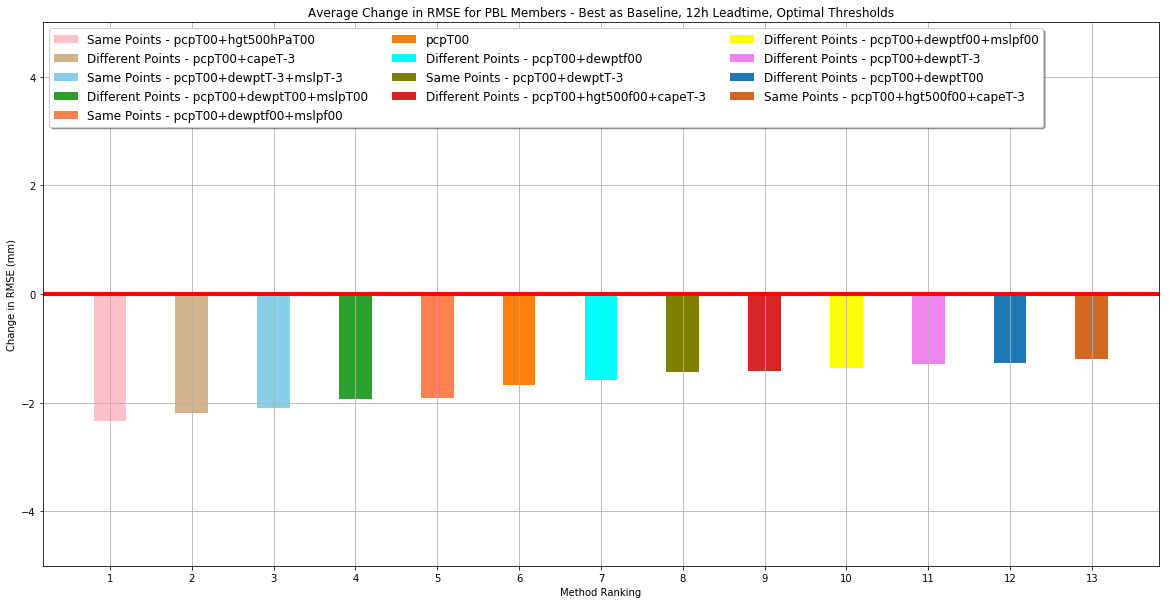

In [97]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 1, 1)
mean_rmse_change = []
i = 0
for method in methods:
    data_an = np.load('/lustre/work/twixtrom/analogue_analysis_optimal/f12/'+method+'/'+method+'_rmse_an_pbl.npy')
    data_best = np.load('/lustre/work/twixtrom/analogue_analysis_optimal/f12/'+method+'/'+method+'_rmse_best_pbl.npy')
    mean_rmse_change.append(np.nanmean(data_best - data_an))

sort = np.argsort(np.array(mean_rmse_change))
rmse_change_sorted = np.array(mean_rmse_change)[sort]
methods_sorted = np.array(methods)[sort]
labels_sorted = np.array(method_labels)[sort]
colors_sorted = np.array(mem_colors)[sort]
for i in range(len(methods)):
    plt.bar(i+1, np.array(rmse_change_sorted[i]), 0.4, label=labels_sorted[i], color=colors_sorted[i])

plt.ylim(-5, 5)
plt.xticks(range(1, 14))
plt.title('Average Change in RMSE for PBL Members - Best as Baseline, 12h Leadtime, Optimal Thresholds')
plt.ylabel('Change in RMSE (mm)')
plt.xlabel('Method Ranking')
ax.axhline(linewidth=4, color='red')
plt.legend(shadow=True, fontsize='large', loc=2, ncol=3)
plt.grid()
plt.show()

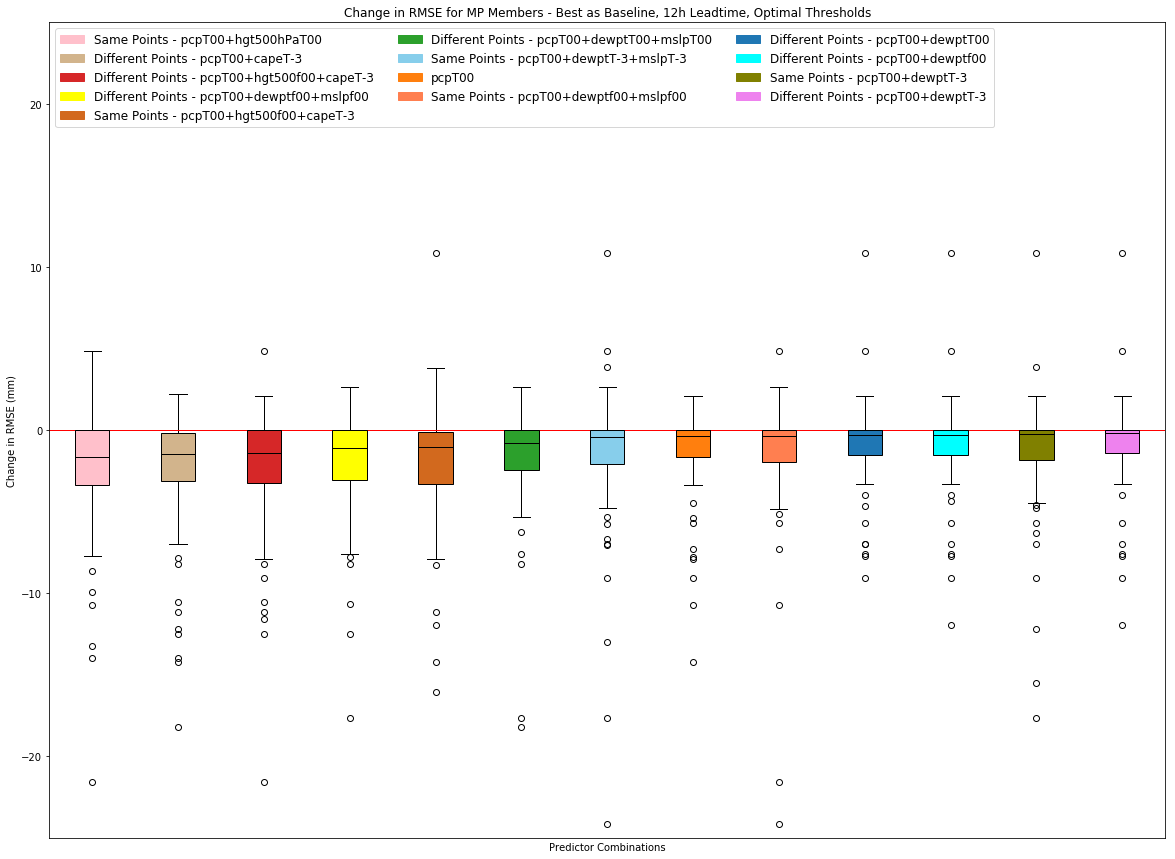

In [9]:
fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(1, 1, 1)
mean_rmse_change = []
i = 0
for method in methods:
    data_an = np.load('/lustre/work/twixtrom/analogue_analysis_optimal/f12/'+method+'/'+method+'_rmse_an_mp.npy')
    data_best = np.load('/lustre/work/twixtrom/analogue_analysis_optimal/f12/'+method+'/'+method+'_rmse_best_mp.npy')
    mean_rmse_change.append(data_best - data_an)
data = {}
for key, array in zip(method_labels, mean_rmse_change):
    data[key] = array
dataframe = pd.DataFrame(data=data)
meds = dataframe.median().sort_values()
bp = dataframe[meds.index].plot.box(ax=ax, rot=90, widths=0.4, patch_artist=True, return_type='dict', color={'medians': 'k', 'boxes': 'k', 'whiskers': 'k'})

legend_patches = []
for patch, label in zip(bp['boxes'], meds.keys()):
    patch.set_facecolor(color_dict[label])
    legend_patches.append(mpatches.Patch(color=color_dict[label], label=label))
plt.ylim(-25, 25)
ax.axhline(linewidth=1, color='red')
plt.title('Change in RMSE for MP Members - Best as Baseline, 12h Leadtime, Optimal Thresholds')
plt.ylabel('Change in RMSE (mm)')
plt.xticks([])
plt.xlabel('Predictor Combinations')
# plt.grid()
plt.legend(handles=legend_patches, fontsize='large', loc=2, ncol=3)
plt.show()

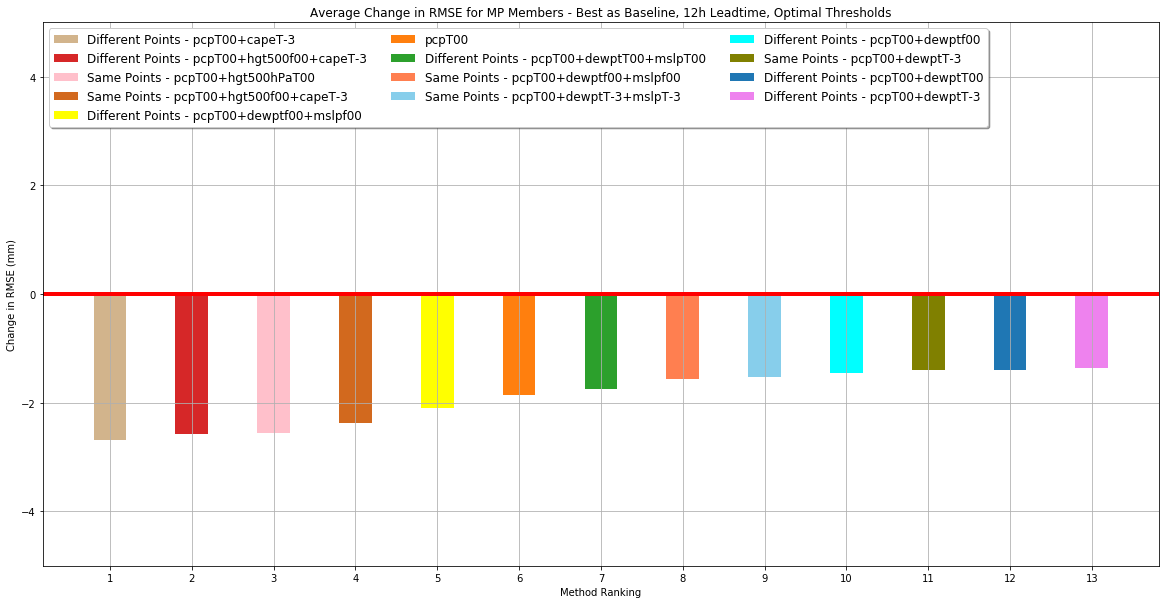

In [99]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 1, 1)
mean_rmse_change = []
i = 0
for method in methods:
    data_an = np.load('/lustre/work/twixtrom/analogue_analysis_optimal/f12/'+method+'/'+method+'_rmse_an_mp.npy')
    data_best = np.load('/lustre/work/twixtrom/analogue_analysis_optimal/f12/'+method+'/'+method+'_rmse_best_mp.npy')
    mean_rmse_change.append(np.nanmean(data_best - data_an))

sort = np.argsort(np.array(mean_rmse_change))
rmse_change_sorted = np.array(mean_rmse_change)[sort]
methods_sorted = np.array(methods)[sort]
labels_sorted = np.array(method_labels)[sort]
colors_sorted = np.array(mem_colors)[sort]
for i in range(len(methods)):
    plt.bar(i+1, np.array(rmse_change_sorted[i]), 0.4, label=labels_sorted[i], color=colors_sorted[i])

plt.ylim(-5, 5)
plt.xticks(range(1, 14))
plt.ylabel('Change in RMSE (mm)')
plt.xlabel('Method Ranking')
plt.title('Average Change in RMSE for MP Members - Best as Baseline, 12h Leadtime, Optimal Thresholds')
ax.axhline(linewidth=4, color='red')
plt.legend(shadow=True, fontsize='large', loc=2, ncol=3)
plt.grid()
plt.show()

In [100]:
c547c111ee93b47b8c0ee650c8e5062dec494ad91e7d217c

NameError: name 'c547c111ee93b47b8c0ee650c8e5062dec494ad91e7d217c' is not defined

# Sigma Sensitivity, PCP Threshold of 10 mm

In [ ]:
thresholds = ['0.5', '1', '2', '5']
thresh_colors = ['tab:orange', 'tab:blue', 'tab:green', 'tab:red']

In [ ]:
fig = plt.figure(figsize=(20, 10), facecolor='white')
ax = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
mean_rmse_change = []
i = 0
method = 'rmse_pcpT00'
for thresh in thresholds:
    data_an = np.load('/lustre/work/twixtrom/analogue_analysis_sigma/f24/domain1/'+
                      method+'/'+thresh+'/'+method+'_rmse_an_pbl.npy')
    data_best = np.load('/lustre/work/twixtrom/analogue_analysis_sigma/f24/domain1/'+
                        method+'/'+thresh+'/'+method+'_rmse_best_pbl.npy')
    mean_rmse_change.append(np.nanmean(data_best - data_an))

sort = np.argsort(np.array(mean_rmse_change))
rmse_change_sorted = np.array(mean_rmse_change)[sort]
thresholds_sorted = np.array(thresholds)[sort]
colors_sorted = np.array(thresh_colors)[sort]
for i in range(len(thresholds)):
    ax.bar(i+1, rmse_change_sorted[i], 0.2, label=thresholds_sorted[i], color=colors_sorted[i])

ax.axhline(linewidth=4, color='red')
ax.set_ylim(-5, 5)
plt.xticks(range(1, 5))
ax.set_title('PBL Members', loc='left')
ax.set_ylabel('Change in RMSE (mm)')
ax.set_xlabel('Method Ranking')
ax.grid()
ax.legend(shadow=True, fontsize='large', loc=2, ncol=3)

mean_rmse_change = []
i = 0
for thresh in thresholds:
    data_an = np.load('/lustre/work/twixtrom/analogue_analysis_sigma/f24/domain1/'+
                      method+'/'+thresh+'/'+method+'_rmse_an_mp.npy')
    data_best = np.load('/lustre/work/twixtrom/analogue_analysis_sigma/f24/domain1/'+
                        method+'/'+thresh+'/'+method+'_rmse_best_mp.npy')
    mean_rmse_change.append(np.nanmean(data_best - data_an))

sort = np.argsort(np.array(mean_rmse_change))
rmse_change_sorted = np.array(mean_rmse_change)[sort]
thresholds_sorted = np.array(thresholds)[sort]
colors_sorted = np.array(thresh_colors)[sort]
for i in range(len(thresholds)):
    ax2.bar(i+1, np.array(rmse_change_sorted[i]), 0.2, label=thresholds_sorted[i], color=colors_sorted[i])

ax2.set_title('MP Members', loc='right')
ax2.set_ylabel('Change in RMSE (mm)')
ax2.set_xlabel('Method Ranking')
ax2.axhline(linewidth=4, color='red')
ax2.set_ylim(-5, 5)
ax2.legend(shadow=True, fontsize='large', loc=2, ncol=3)
ax2.grid()
plt.suptitle('Average Change in RMSE by Smoothing Sigma for F24 - Best as Baseline', fontsize='large', y=0.95)
plt.show()

In [ ]:
fig = plt.figure(figsize=(20, 10), facecolor='white')
ax = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
mean_rmse_change = []
i = 0
method = 'rmse_pcpT00'
for thresh in thresholds:
    data_an = np.load('/lustre/work/twixtrom/analogue_analysis_sigma/f12/domain1/'+
                      method+'/'+thresh+'/'+method+'_rmse_an_pbl.npy')
    data_best = np.load('/lustre/work/twixtrom/analogue_analysis_sigma/f12/domain1/'+
                        method+'/'+thresh+'/'+method+'_rmse_best_pbl.npy')
    mean_rmse_change.append(np.nanmean(data_best - data_an))

sort = np.argsort(np.array(mean_rmse_change))
rmse_change_sorted = np.array(mean_rmse_change)[sort]
thresholds_sorted = np.array(thresholds)[sort]
colors_sorted = np.array(thresh_colors)[sort]
for i in range(len(thresholds)):
    ax.bar(i+1, np.array(rmse_change_sorted[i]), 0.2, label=thresholds_sorted[i], color=colors_sorted[i])

ax.axhline(linewidth=4, color='red')
ax.set_ylim(-5, 5)
plt.xticks(range(1, 5))
ax.set_title('PBL Members', loc='left')
ax.set_ylabel('Change in RMSE (mm)')
ax.set_xlabel('Method Ranking')
ax.grid()
ax.legend(shadow=True, fontsize='large', loc=2, ncol=3)

mean_rmse_change = []
i = 0
for thresh in thresholds:
    data_an = np.load('/lustre/work/twixtrom/analogue_analysis_sigma/f12/domain1/'+
                      method+'/'+thresh+'/'+method+'_rmse_an_mp.npy')
    data_best = np.load('/lustre/work/twixtrom/analogue_analysis_sigma/f12/domain1/'+
                        method+'/'+thresh+'/'+method+'_rmse_best_mp.npy')
    mean_rmse_change.append(np.nanmean(data_best - data_an))

sort = np.argsort(np.array(mean_rmse_change))
rmse_change_sorted = np.array(mean_rmse_change)[sort]
thresholds_sorted = np.array(thresholds)[sort]
colors_sorted = np.array(thresh_colors)[sort]
for i in range(len(thresholds)):
    ax2.bar(i+1, np.array(rmse_change_sorted[i]), 0.2, label=thresholds_sorted[i], color=colors_sorted[i])

ax2.set_title('MP Members', loc='right')
ax2.set_ylabel('Change in RMSE (mm)')
ax2.set_xlabel('Method Ranking')
ax2.axhline(linewidth=4, color='red')
ax2.set_ylim(-5, 5)
ax2.legend(shadow=True, fontsize='large', loc=2, ncol=3)
ax2.grid()
plt.suptitle('Average Change in RMSE by Smoothing Sigma for F12 - Best as Baseline', fontsize='large', y=0.95)
plt.show()